## **Customer Life Time Value Prediction**

## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
#import mglearn 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv to WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv



#Reading the data from CSV

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

# Top 5 values 

In [5]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [6]:
df.tail()

Customer       State  Customer Lifetime Value Response  Coverage  \
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     Location Code Marital Status  Monthly Premium Auto  \
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
9129   Personal L1           Offer2           Web          198.234764   
9130  Corporate L3           Offer1        Branch          379.200000   
9131  Corporate L2           Offer1        Branch          790.784983   
9132   Personal L2           Offer3        Branch          691.200000   
9133  Corporate L3           Offer4   Call Center          369.600000   

      Vehicle Class Vehicle Size  
9129  Four-Door Car      Medsize  
9130  Four-Door Car      Medsize  
9131  Four-Door Car      Medsize  
9132  Four-Door Car        Large  
9133   Two-Door Car      Medsize

In [7]:
df.shape

(9134, 24)

# Exploring the dataset

# Calculating number of rows and columns

In [8]:
print("No of columns in the dataset = ",df.shape[1])
print("No of rows in the dataset = ",df.shape[0])

No of columns in the dataset =  24
No of rows in the dataset =  9134


In [9]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


# Calculating total number null values 

In [10]:
print("Null values in the dataset = ",df.isnull().sum().sum())

Null values in the dataset =  0


# Data Types of each field






In [11]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

# Basic information of data frame

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Various descriptive statistics on the DataFrame

In [13]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678


# Correlation Matrix

In [14]:
corr_matrix = df.corr()
corr_matrix

Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                    0.005026                 1.000000   
Months Since Policy Inception              0.020257                -0.042959   
Number of Open Complaints                 -0.013122                 0.005354   
Number of Policies                        -0.011233                 0.009136   
Total Claim Amount                         0.632017                 0.007563   

                               Months Since Policy Inception  \
Customer Lifetime Value                             0.009418   
Income                                             -0.000875   
Monthly Premium Auto                                0.020257   
Months Since Last Claim                            -0.042959   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                          -0.001158   
Number of Policies                                 -0.013333   
Total Claim Amount                                  0.003335   

                               Number of Open Complaints  Number of Policies  \
Customer Lifetime Value                        -0.036343            0.021955   
Income                                          0.006408           -0.008656   
Monthly Premium Auto                           -0.013122           -0.011233   
Months Since Last Claim                         0.005354            0.009136   
Months Since Policy Inception                  -0.001158           -0.013333   
Number of Open Complaints                       1.000000            0.001498   
Number of Policies                              0.001498            1.000000   
Total Claim Amount                             -0.014241           -0.002354   

                               Total Claim Amount  
Customer Lifetime Value                  0.226451  
Income                                  -0.355254  
Monthly Premium Auto                     0.632017  
Months Since Last Claim                  0.007563  
Months Since Policy Inception            0.003335  
Number of Open Complaints               -0.014241  
Number of Policies                      -0.002354  
Total Claim Amount                       1.000000

<function matplotlib.pyplot.show>

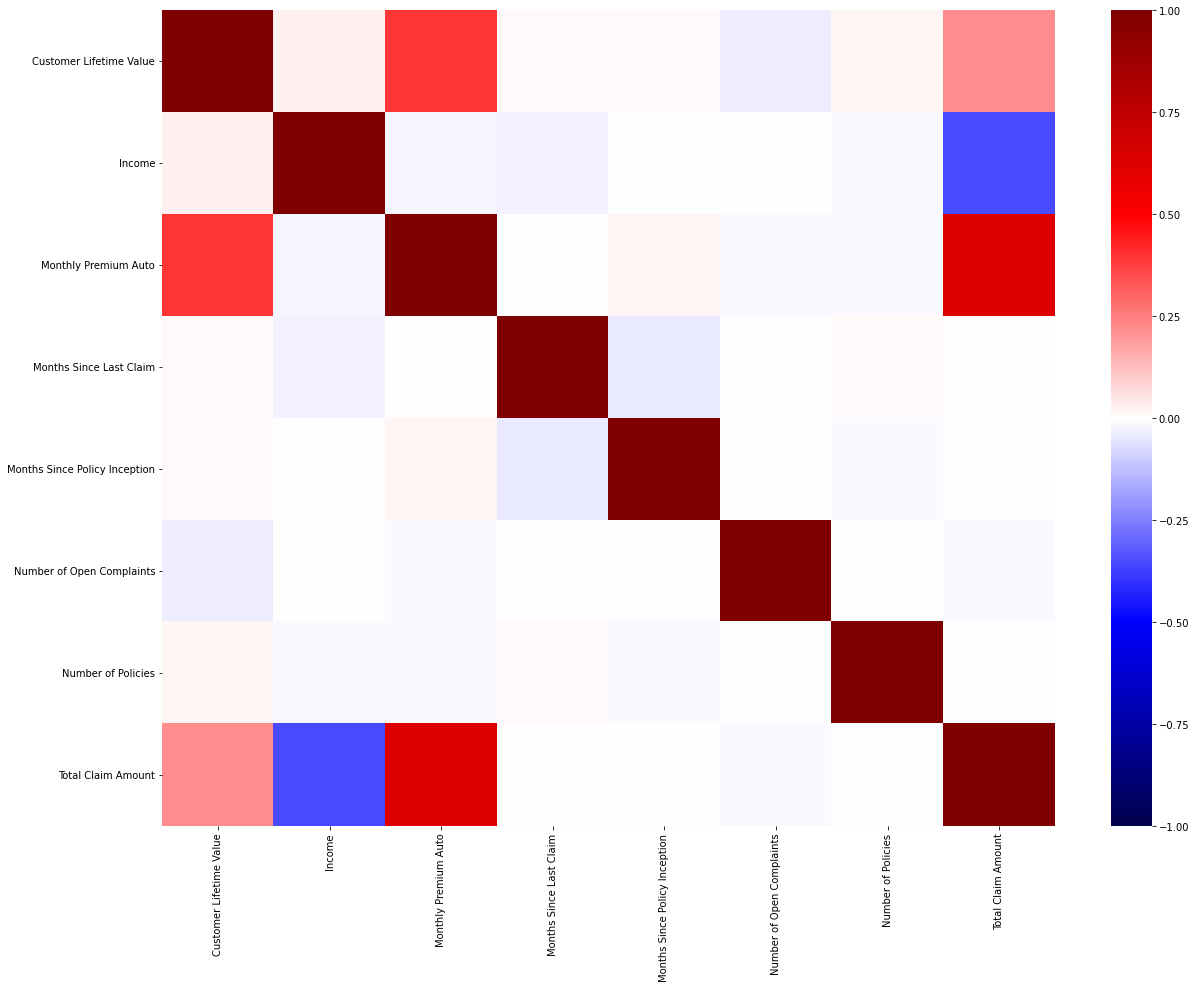

In [15]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, cmap= "seismic")
plt.gca().patch.set(hatch = "df", edgecolor = "#555")
plt.show

# Box Plots of Quantative Variables

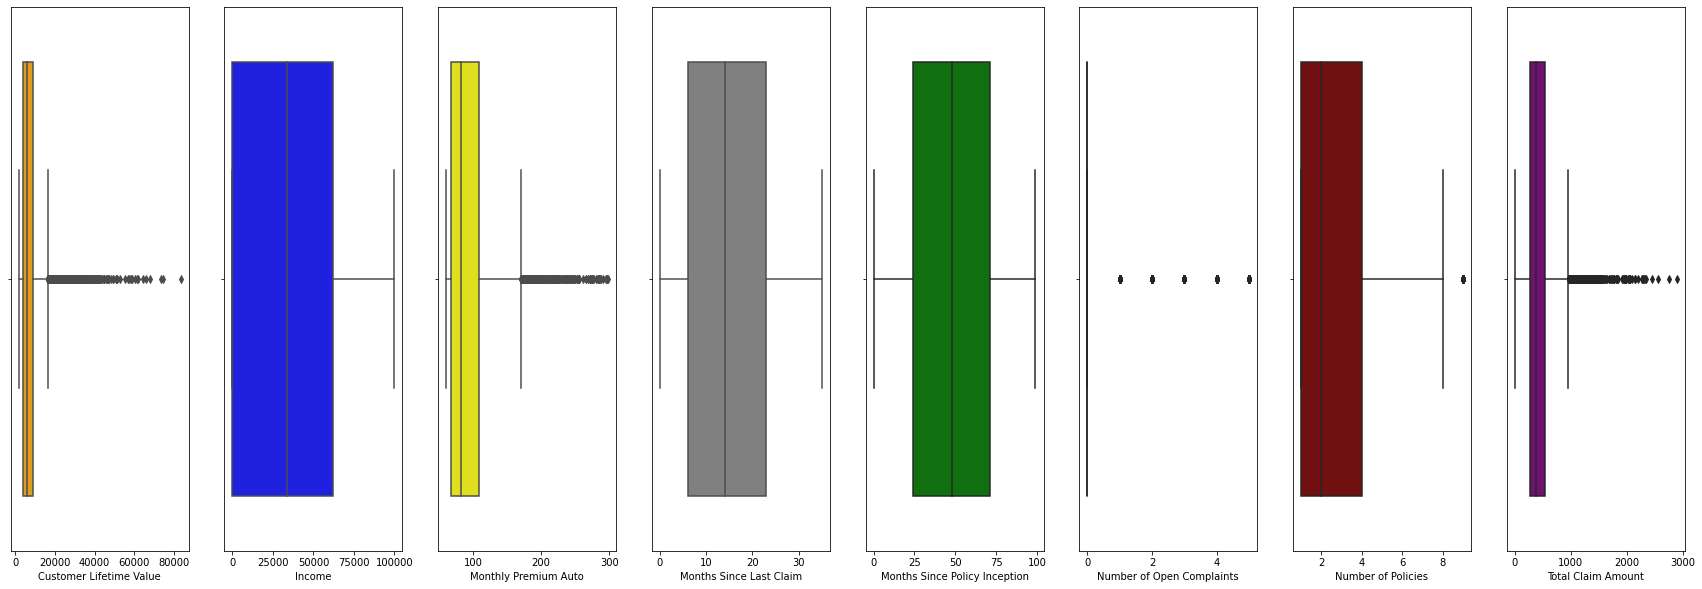

In [16]:
fig, axes = plt.subplots(ncols=8, figsize=(30,10))
box_plot1 = sns.boxplot(df["Customer Lifetime Value"], ax=axes[0], color = 'orange')
box_plot2 = sns.boxplot(df["Income"], ax=axes[1], color = 'blue')
box_plot3 = sns.boxplot(df["Monthly Premium Auto"], ax=axes[2], color = 'Yellow')
box_plot4 = sns.boxplot(df["Months Since Last Claim"], ax=axes[3], color = 'Gray')
box_plot5 = sns.boxplot(df["Months Since Policy Inception"], ax=axes[4], color = 'green')
box_plot6 = sns.boxplot(df["Number of Open Complaints"], ax=axes[5], color = 'green')
box_plot7 = sns.boxplot(df["Number of Policies"], ax=axes[6], color = 'maroon')
box_plot8 = sns.boxplot(df["Total Claim Amount"], ax=axes[7], color = 'purple')

# Feature: Customer Lifetime Value (Target Variable)

In [17]:
# The taget variable for our data is the Customer Lifetime Prediction. 
print("Target Varibale statistics : ")
df['Customer Lifetime Value'].describe()

Target Varibale statistics : 


count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [18]:
df['Customer Lifetime Value'].isna().sum()

0

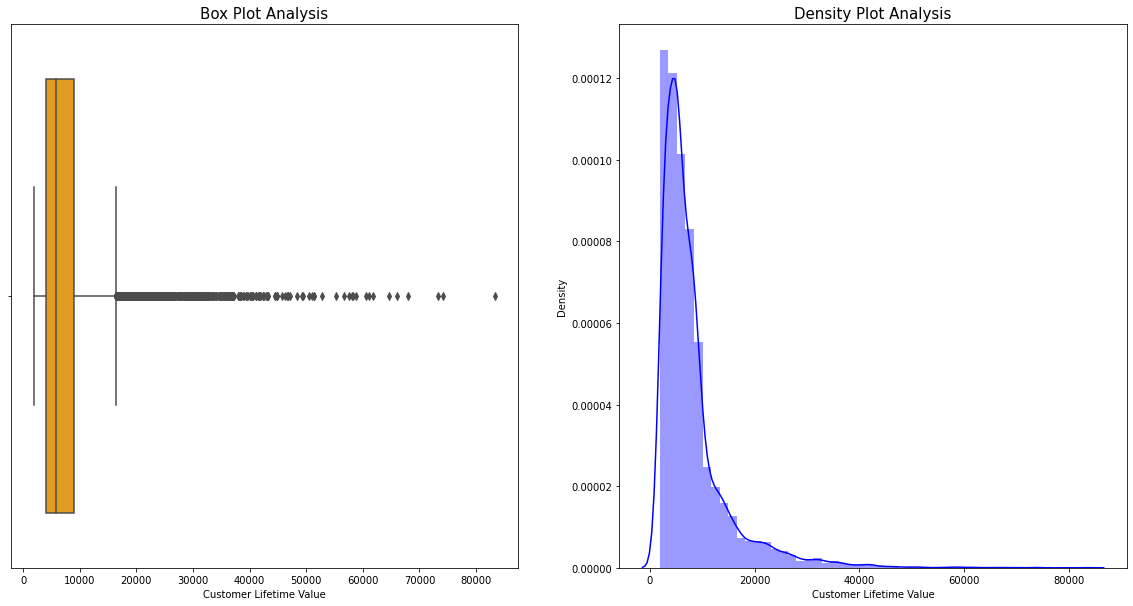

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Customer Lifetime Value"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Customer Lifetime Value"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

In [20]:
#From the above plots we observe that 
#1) There are no null values
#2) Outliers are present.
#3) The density plot is skewed to the right so we can use median for statistical analysis


# Feature: Response

In [21]:
df[['Customer Lifetime Value','Response']].groupby('Response').median()

Customer Lifetime Value
Response                         
No                    5814.145650
Yes                   5596.257433

In [22]:
df['Response'].isna().sum()

0

Text(0, 0.5, 'Count')

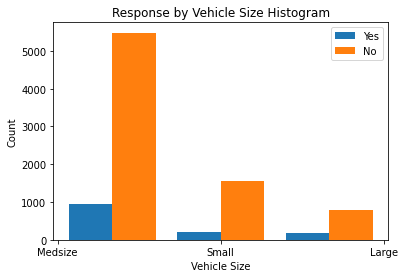

In [23]:
df1 = df[df['Response']=='Yes']['Vehicle Size']
df2 = df[df['Response']=='No']['Vehicle Size']
plt.hist([df1, df2], bins = 3)
plt.legend(('Yes', 'No'), loc='best')
plt.title('Response by Vehicle Size Histogram')
plt.xlabel('Vehicle Size')
plt.ylabel('Count')


# Feature: Gender

In [24]:
df[['Customer Lifetime Value','Gender']].groupby('Gender').median()

Customer Lifetime Value
Gender                         
F                   5741.711754
M                   5815.155446

Plotting Customer Lifetime Value and Income scatter plots segregated on the basis of Gender.

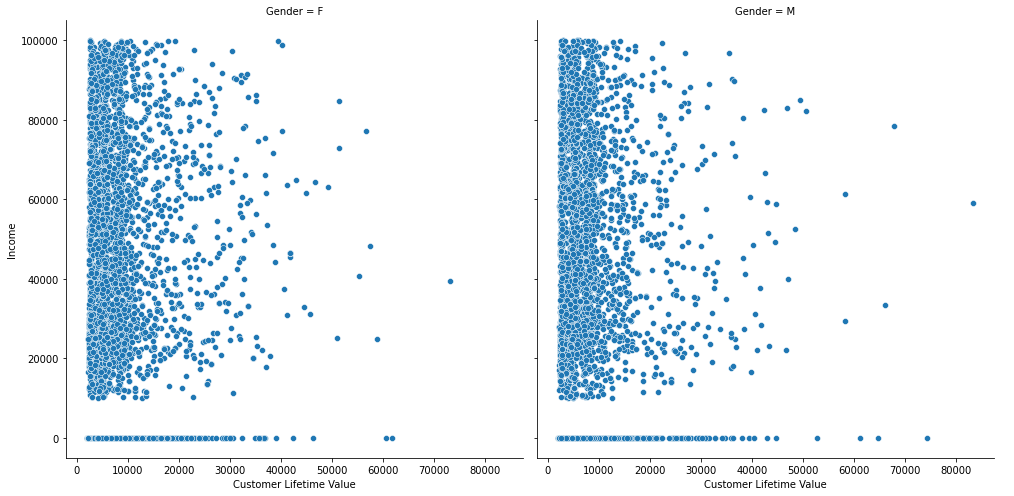

In [25]:
g = sns.FacetGrid(df, col="Gender", height=7)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Income')
g.add_legend()

# Feature: Employment Status

In [26]:
df[['Customer Lifetime Value', 'EmploymentStatus']].groupby('EmploymentStatus').median()

Customer Lifetime Value
EmploymentStatus                         
Disabled                      5623.314472
Employed                      5863.592560
Medical Leave                 5258.924832
Retired                       5395.217776
Unemployed                    5619.689084

Plotting Customer Lifetime Value and Income scatter plots segregated on the basis of Employment Status.

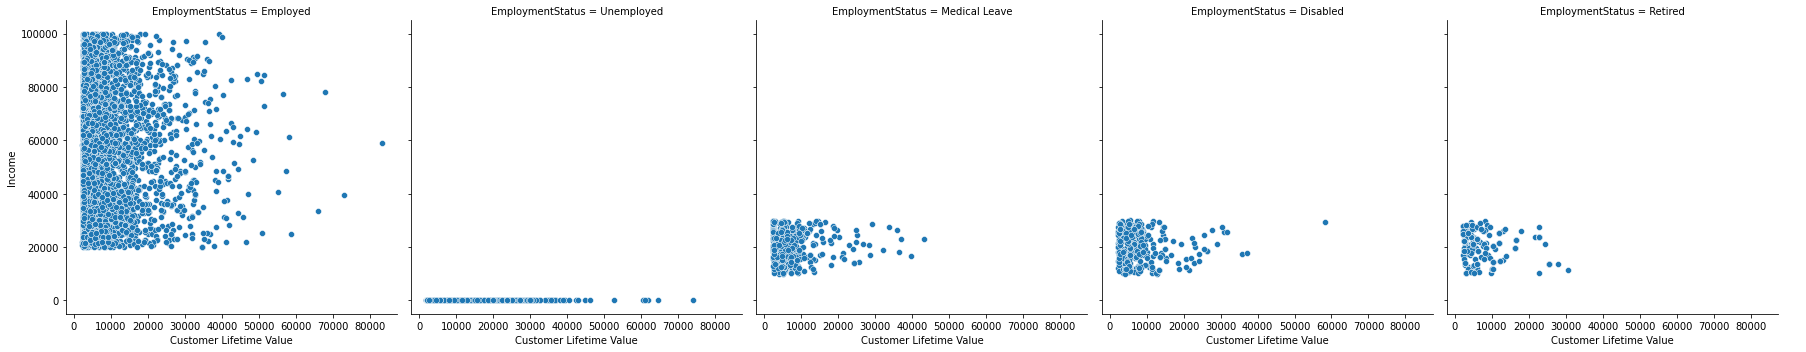

In [27]:
g = sns.FacetGrid(df, col="EmploymentStatus", height=5)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Income')
g.add_legend()


# Feature: Vehicle Class

In [28]:
df[['Customer Lifetime Value', 'Vehicle Class']].groupby('Vehicle Class').median()

Customer Lifetime Value
Vehicle Class                         
Four-Door Car              5320.343098
Luxury Car                14510.443760
Luxury SUV                14395.515695
SUV                        8592.585972
Sports Car                 8554.788501
Two-Door Car               5266.700976

Plotting Customer Lifetime Value and Total Claim Amount scatter plots segregated on the basis of Vehicle Class.

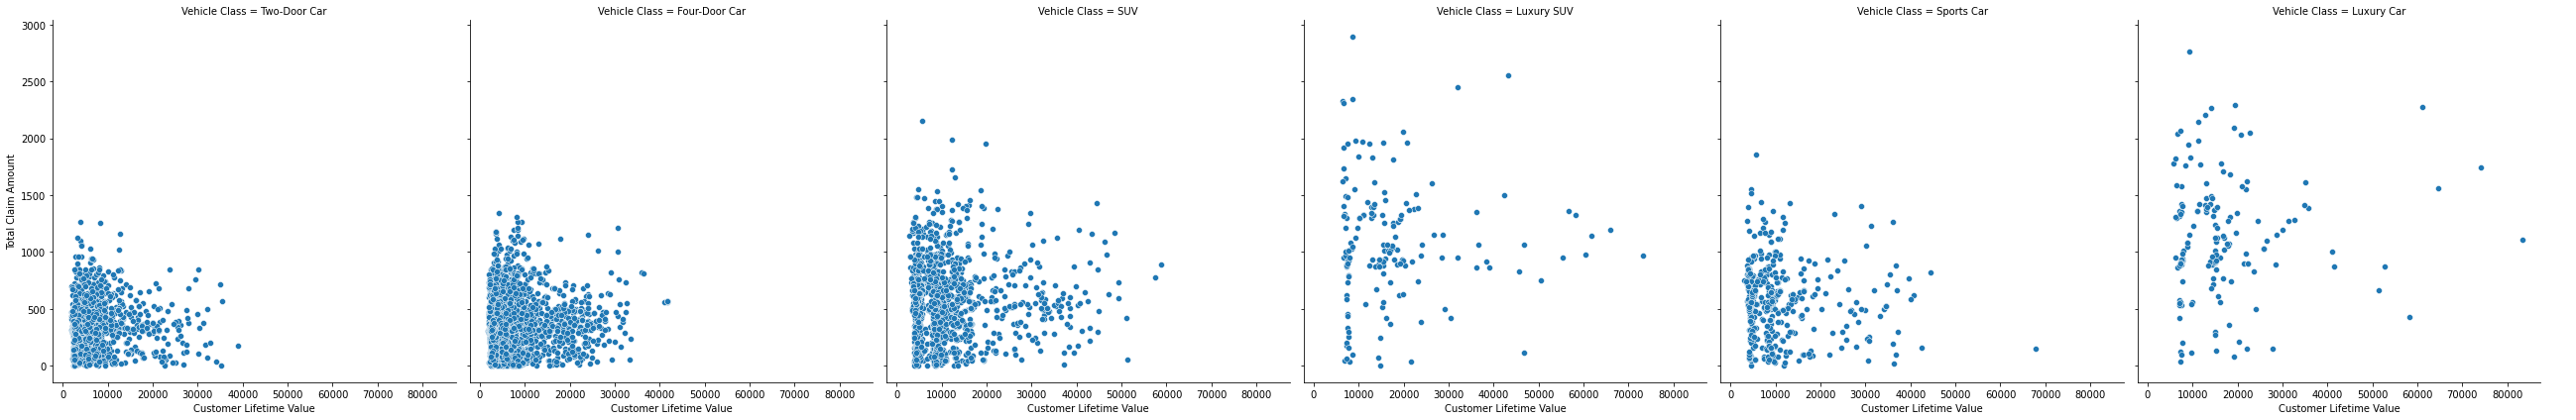

In [29]:
g = sns.FacetGrid(df, col="Vehicle Class", height=6)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Total Claim Amount')
g.add_legend()


# Feature: Monthly Premiuim Auto

In [30]:
df['Monthly Premium Auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [31]:
df['Monthly Premium Auto'].isna().sum()

0

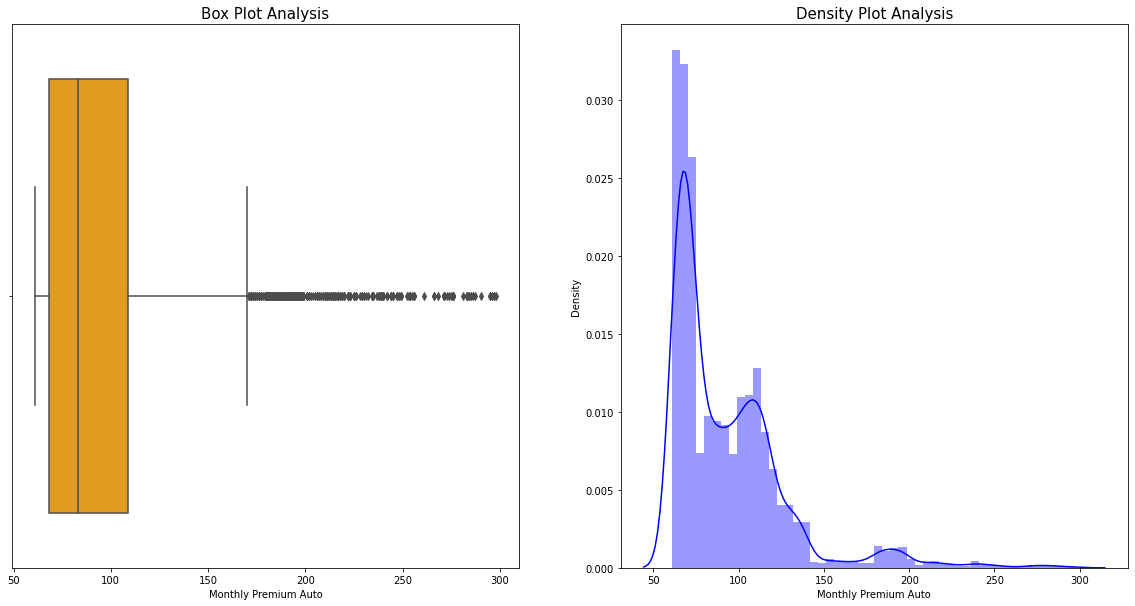

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Monthly Premium Auto"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Monthly Premium Auto"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

From the above plots, we can observe that
1) There are no null values.
2) Outliers are present
3) The density plot is skewed to the right, hence we can consider the median for statistical analysis



# Feature: Total Claim Amount

In [33]:
df['Total Claim Amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

In [34]:
df['Total Claim Amount'].isna().sum()

0

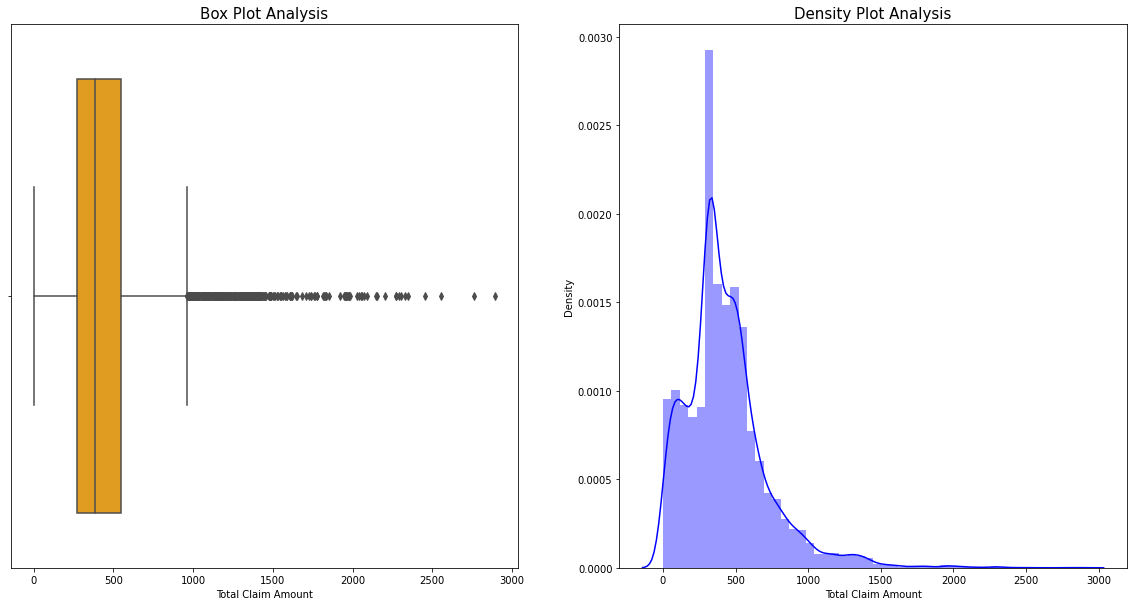

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Total Claim Amount"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Total Claim Amount"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

From the above plots, we can observe that 1) There are no null values. 2) Outliers are present 3) The density plot is skewed to the right, hence we can consider the median for statistical analysis


# Handling Null Values

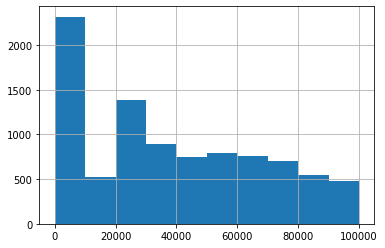

In [36]:
df['Income'].hist()

The plot for Income is skewed to the right so null values can be replaced with median.

In [37]:
df['Income'] = df['Income'].fillna(df['Income'].median())

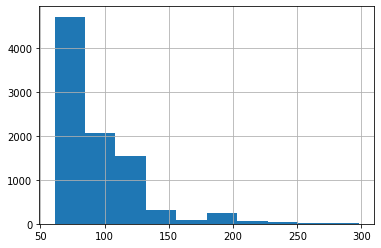

In [38]:
df['Monthly Premium Auto'].hist()

The plot for Montly Premium Auto skewed to the right, so we will replace the missing values with the Median.

In [39]:
df['Monthly Premium Auto']= df['Monthly Premium Auto'].fillna(df['Monthly Premium Auto'].median())

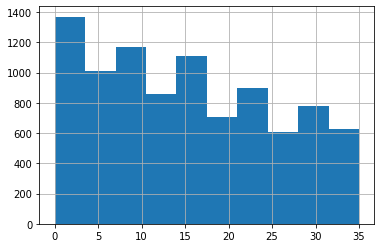

In [40]:
df['Months Since Last Claim'].hist()

The plot for Months Since last Clain is skewed to the right, so we will again use Median for the missing values.

In [41]:
df['Months Since Last Claim'] = df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].median())

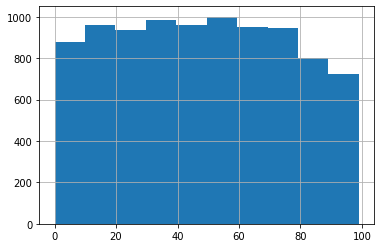

In [42]:
df['Months Since Policy Inception'].hist()

The plot for Months Since Policy Inception is uniformly distributes, so missing values will be replaced by the mean.

In [43]:
df['Months Since Policy Inception'] = df['Months Since Policy Inception'].fillna(df['Months Since Policy Inception'].mean())

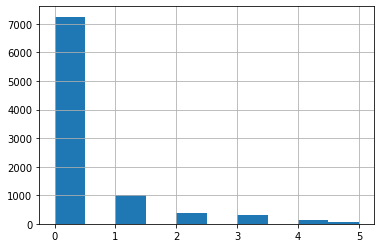

In [44]:
df['Number of Open Complaints'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [45]:
df['Number of Open Complaints'] = df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].median())

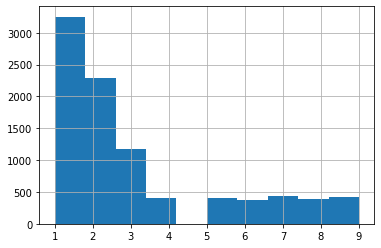

In [46]:
df['Number of Policies'].hist()

The plot for Number of Policies is skewed to the right, so we will again use Median for the missing values.

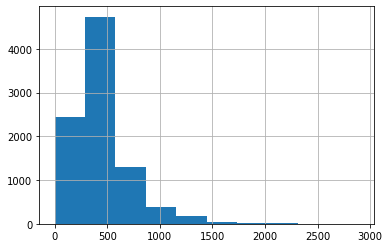

In [47]:
df['Total Claim Amount'].hist()

The plot for Total Claim Amount is skewed to the right, so missing values will be replaced by median.

In [48]:
df['Total Claim Amount'] = df['Total Claim Amount'].fillna(df['Total Claim Amount'].median())

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i


# Handling Missing Values in Categorical or Ordinal Variables

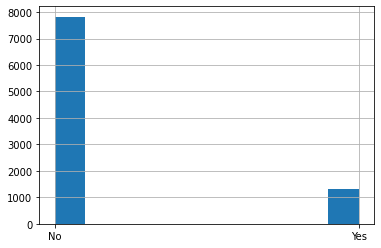

In [50]:
df['Response'].hist()

The major chunk of the Response is no, so missing values will be replaced by 'No' (mode)

In [51]:
df['Response'] = df['Response'].fillna(df['Response'].mode()[0])

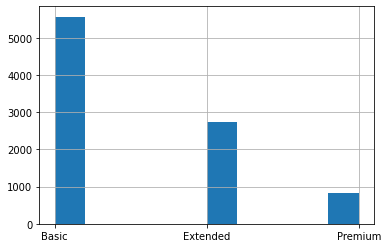

In [52]:
df['Coverage'].hist()

Since the majority of the customers have Basic as their coverage, missing values can be replaced with Basic i.e. Mode

In [53]:
df['Coverage'] = df['Coverage'].fillna(df['Coverage'].mode()[0])

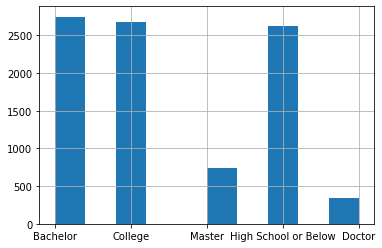

In [54]:
df['Education'].hist()

Since the majority of the customers have Bachelors as their Education, missing values can be replaced with Bachelor i.e. Mode

In [55]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

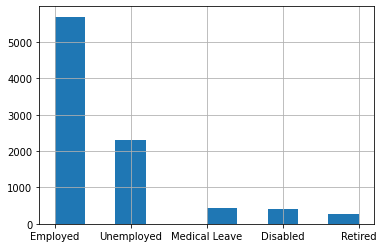

In [56]:
df['EmploymentStatus'].hist()

Since the majority of the customers are employed, missing values can be replaced with Employed i.e. Mode

In [57]:
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])

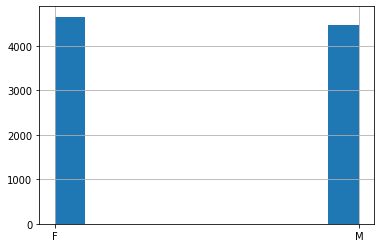

In [58]:
df['Gender'].hist()

Since the majority of customers are 'F', so we replace the missing values with mode.

In [59]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

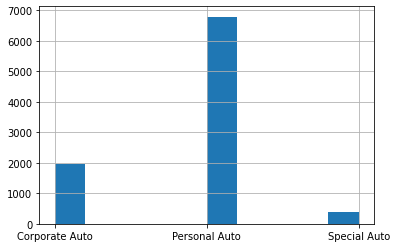

In [60]:
df['Policy Type'].hist()

Since the majority of customers have policy type 'Personal Auto', so we replace the missing values with mode.

In [61]:
df['Policy Type'] = df['Policy Type'].fillna(df['Policy Type'].mode()[0])

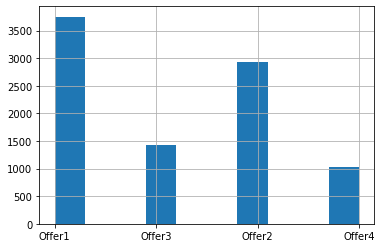

In [62]:
df['Renew Offer Type'].hist()

Since the majority of customers have Renew Offer Type 'Offer 1', so we replace the missing values with mode.

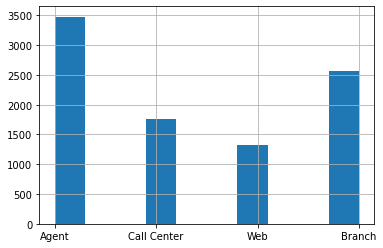

In [63]:
df['Sales Channel'].hist()

Since the majority of customers have sales channel 'Agent', so we replace the missing values with mode.

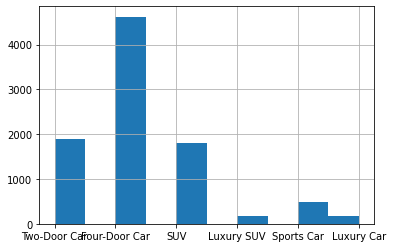

In [64]:
df['Vehicle Class'].hist()

Since the majority of customers have 'Four-Door Car', so we replace the missing values with mode.

In [65]:
df['Vehicle Class'] = df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0])

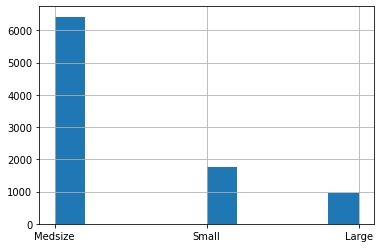

In [66]:
df['Vehicle Size'].hist()

Since the majority of customers have 'Medsize' car, so we replace the missing values with mode

In [67]:
df['Vehicle Size'] = df['Vehicle Size'].fillna(df['Vehicle Size'].mode()[0])

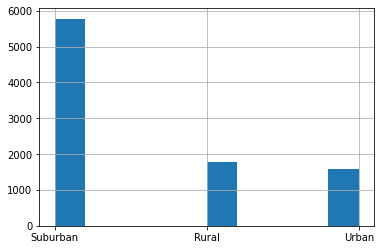

In [68]:
df['Location Code'].hist()

Since the majority of customers are from 'Suburban' location, so we replace the missing values with mode.

In [69]:
df['Location Code'] = df['Location Code'].fillna(df['Location Code'].mode()[0])

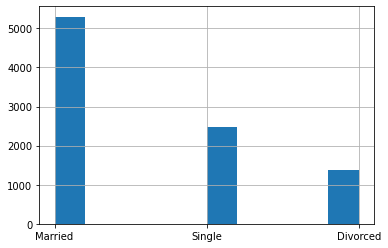

In [70]:
df['Marital Status'].hist()

Since the majority of customers are 'Married', so we replace the missing values with mode.

In [71]:
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

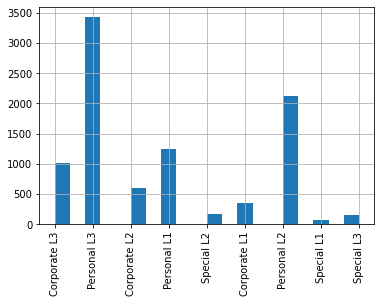

In [72]:
df['Policy'].hist(xrot=90, bins= 20)

Since the majority of customers have 'Personal L3', so we replace the missing values with mode.

In [73]:
df['Policy'] = df['Policy'].fillna(df['Policy'].mode()[0])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Dropping non important columns

In [75]:
df = df.drop(['Customer', 'State', 'Effective To Date'], axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   int64  
 10  Months Since Last Claim        9134 non-null   int64  
 11  Months Since Policy Inception  9134 non-null   int64  
 12  Number of Open Complaints      9134 non-null   i

# Handling Categorical or Ordinal Variables


Plotting histograms for categorical variables

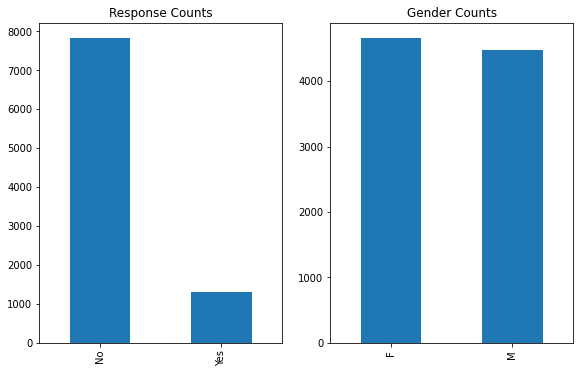

In [77]:
plt.rc('figure', figsize=(20, 10))
fizsize_with_subplots = (20, 20)
bin_size = 10

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Response'].value_counts().plot(kind='bar', 
                                         title='Response Counts')
plt.subplot2grid(fig_dims, (0, 1))
df['Gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')

As NO is the frequent class in column response so we map 'NO' to 1 and 'YES' to 0
Also, Female is the frequent class in column Gender so we map 'F' to 1 and 'M' to 0

In [78]:
df['Response'] = df['Response'].map({'No':1, 'Yes':0}).astype(int)
df['Gender'] = df['Gender'].map({'F':1, 'M':0}).astype(int)

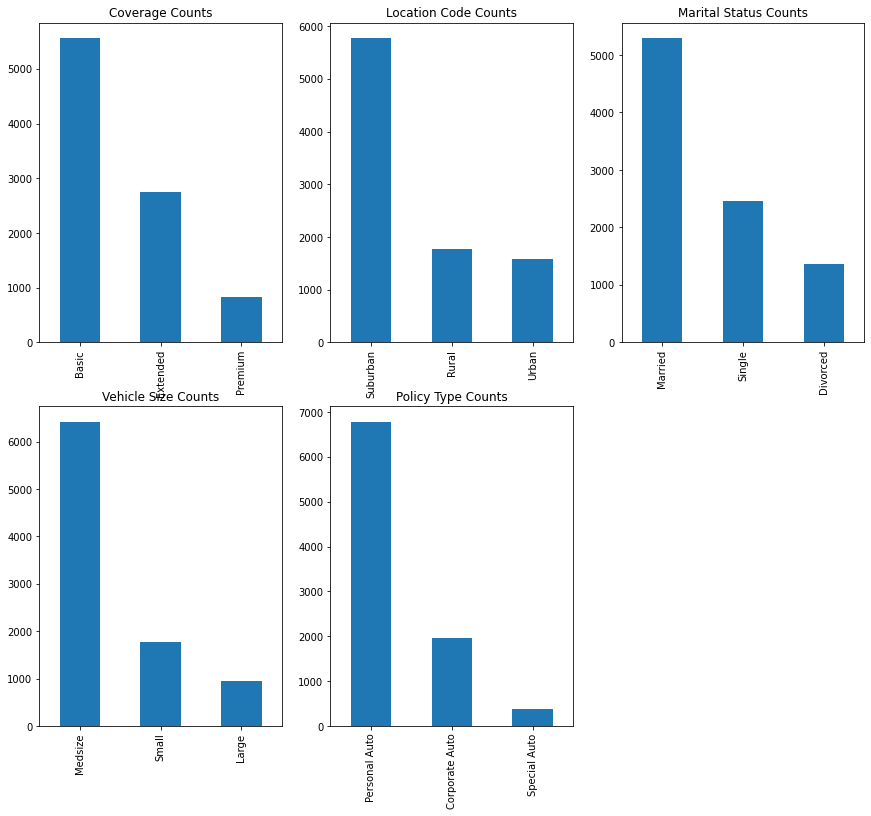

In [79]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Coverage'].value_counts().plot(kind='bar', 
                                         title='Coverage Counts')
plt.subplot2grid(fig_dims, (0, 1))
df['Location Code'].value_counts().plot(kind='bar', 
                                         title='Location Code Counts')

plt.subplot2grid(fig_dims, (0, 2))
df['Marital Status'].value_counts().plot(kind='bar', 
                                         title='Marital Status Counts')

plt.subplot2grid(fig_dims, (1, 0))
df['Vehicle Size'].value_counts().plot(kind='bar', 
                                         title='Vehicle Size Counts')

plt.subplot2grid(fig_dims, (1, 1))
df['Policy Type'].value_counts().plot(kind='bar', 
                                         title='Policy Type Counts')

We replace the columns Coverage, Location Code, Martial Status, Vehicle Size and Policy Type with a one-hot-vector of length 3.

In [80]:
cols = pd.get_dummies(df['Coverage'], prefix= 'Coverage')
df[cols.columns] = cols
df.drop('Coverage', axis = 1, inplace = True)

cols = pd.get_dummies(df['Location Code'], prefix= 'Location Code')
df[cols.columns] = cols
df.drop('Location Code', axis = 1, inplace = True)

cols = pd.get_dummies(df['Marital Status'], prefix= 'Marital Status')
df[cols.columns] = cols
df.drop('Marital Status', axis = 1, inplace = True)

cols = pd.get_dummies(df['Vehicle Size'], prefix= 'Vehicle Size')
df[cols.columns] = cols
df.drop('Vehicle Size', axis = 1, inplace = True)

cols = pd.get_dummies(df['Policy Type'], prefix= 'Policy Type')
df[cols.columns] = cols
df.drop('Policy Type', axis = 1, inplace = True)

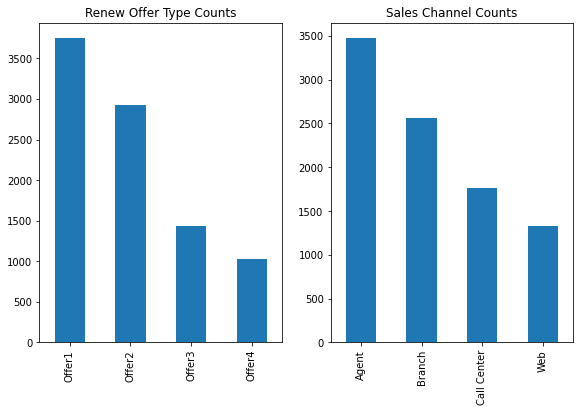

In [81]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Renew Offer Type'].value_counts().plot(kind='bar', 
                                         title='Renew Offer Type Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['Sales Channel'].value_counts().plot(kind='bar', 
                                         title='Sales Channel Counts')

Replace the columns Renew Offer Type and Sales Channel with a one-hot-vector of length 4.

In [82]:
cols = pd.get_dummies(df['Renew Offer Type'], prefix= 'Renew Offer Type')
df[cols.columns] = cols
df.drop('Renew Offer Type', axis = 1, inplace = True)

cols = pd.get_dummies(df['Sales Channel'], prefix= 'Sales Channel')
df[cols.columns] = cols
df.drop('Sales Channel', axis = 1, inplace = True)

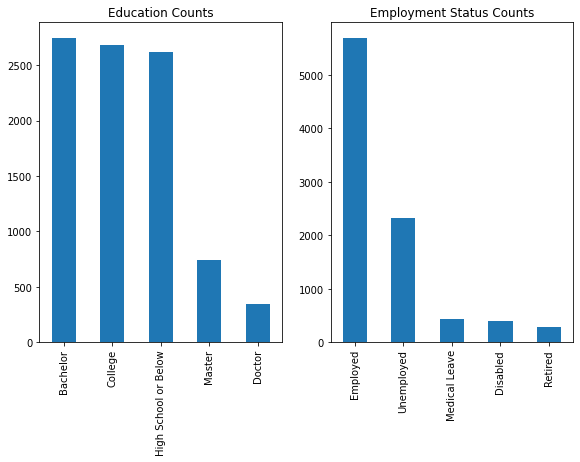

In [83]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Education'].value_counts().plot(kind='bar', 
                                         title='Education Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['EmploymentStatus'].value_counts().plot(kind='bar', 
                                         title='Employment Status Counts')

Replace the columns Education and Employment Status with a one-hot-vector of length 5.

In [84]:
cols = pd.get_dummies(df['Education'], prefix= 'Education')
df[cols.columns] = cols
df.drop('Education', axis = 1, inplace = True)

cols = pd.get_dummies(df['EmploymentStatus'], prefix= 'EmploymentStatus')
df[cols.columns] = cols
df.drop('EmploymentStatus', axis = 1, inplace = True)

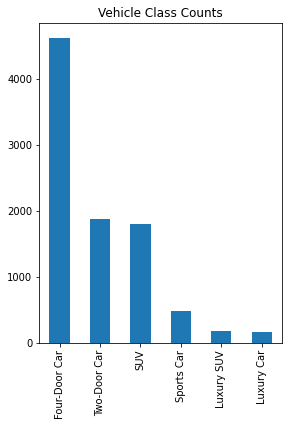

In [85]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Vehicle Class'].value_counts().plot(kind='bar', 
                                         title='Vehicle Class Counts')

Now, we replace the column Vehicle Class with a one-hot-vector of length 6

In [86]:
cols = pd.get_dummies(df['Vehicle Class'], prefix= 'Vehicle Class')
df[cols.columns] = cols
df.drop('Vehicle Class', axis = 1, inplace = True)

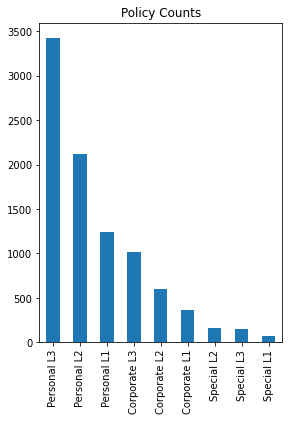

In [87]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Policy'].value_counts().plot(kind='bar', 
                                         title='Policy Counts')

Finally, we replace the column Policy with a one-hot-vector of length 9

In [88]:
cols = pd.get_dummies(df['Policy'], prefix= 'Policy')
df[cols.columns] = cols
df.drop('Policy', axis = 1, inplace = True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Response                        9134 non-null   int64  
 2   Gender                          9134 non-null   int64  
 3   Income                          9134 non-null   int64  
 4   Monthly Premium Auto            9134 non-null   int64  
 5   Months Since Last Claim         9134 non-null   int64  
 6   Months Since Policy Inception   9134 non-null   int64  
 7   Number of Open Complaints       9134 non-null   int64  
 8   Number of Policies              9134 non-null   int64  
 9   Total Claim Amount              9134 non-null   float64
 10  Coverage_Basic                  9134 non-null   uint8  
 11  Coverage_Extended               9134 non-null   uint8  
 12  Coverage_Premium                91

In [90]:
df.describe()

Customer Lifetime Value     Response       Gender        Income  \
count              9134.000000  9134.000000  9134.000000   9134.000000   
mean               8004.940475     0.856799     0.509963  37657.380009   
std                6870.967608     0.350297     0.499928  30379.904734   
min                1898.007675     0.000000     0.000000      0.000000   
25%                3994.251794     1.000000     0.000000      0.000000   
50%                5780.182197     1.000000     1.000000  33889.500000   
75%                8962.167041     1.000000     1.000000  62320.000000   
max               83325.381190     1.000000     1.000000  99981.000000   

       Monthly Premium Auto  Months Since Last Claim  \
count           9134.000000              9134.000000   
mean              93.219291                15.097000   
std               34.407967                10.073257   
min               61.000000                 0.000000   
25%               68.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   

       Months Since Policy Inception  Number of Open Complaints  \
count                    9134.000000                9134.000000   
mean                       48.064594                   0.384388   
std                        27.905991                   0.910384   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       Number of Policies  Total Claim Amount  Coverage_Basic  \
count         9134.000000         9134.000000     9134.000000   
mean             2.966170          434.088794        0.609591   
std              2.390182          290.500092        0.487869   
min              1.000000            0.099007        0.000000   
25%              1.000000          272.258244        0.000000   
50%              2.000000          383.945434        1.000000   
75%              4.000000          547.514839        1.000000   
max              9.000000         2893.239678        1.000000   

       Coverage_Extended  Coverage_Premium  Location Code_Rural  \
count        9134.000000       9134.000000          9134.000000   
mean            0.300197          0.090212             0.194110   
std             0.458369          0.286501             0.395536   
min             0.000000          0.000000             0.000000   
25%             0.000000          0.000000             0.000000   
50%             0.000000          0.000000             0.000000   
75%             1.000000          0.000000             0.000000   
max             1.000000          1.000000             1.000000   

       Location Code_Suburban  Location Code_Urban  Marital Status_Divorced  \
count             9134.000000          9134.000000              9134.000000   
mean                 0.632691             0.173199                 0.149880   
std                  0.482098             0.378440                 0.356973   
min                  0.000000             0.000000                 0.000000   
25%                  0.000000             0.000000                 0.000000   
50%                  1.000000             0.000000                 0.000000   
75%                  1.000000             0.000000                 0.000000   
max                  1.000000             1.000000                 1.000000   

       Marital Status_Married  Marital Status_Single  Vehicle Size_Large  \
count             9134.000000             9134.00000         9134.000000   
mean                 0.580031                0.27009            0.103569   
std                  0.493581                0.44403            0.304717   
min                  0.00

In [91]:
df.head()

Customer Lifetime Value  Response  Gender  Income  Monthly Premium Auto  \
0              2763.519279         1       1   56274                    69   
1              6979.535903         1       1       0                    94   
2             12887.431650         1       1   48767                   108   
3              7645.861827         1       0       0                   106   
4              2813.692575         1       0   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  \
0                          0                   1          384.811147   
1                          0                   8         1131.464935   
2                          0                   2          566.472247   
3                          0                   7          529.881344   
4                          0                   1          138.130879   

   Coverage_Basic  Coverage_Extended  Coverage_Premium  Location Code_Rural  \
0               1                  0                 0                    0   
1               0                  1                 0                    0   
2               0                  0                 1                    0   
3               1                  0                 0                    0   
4               1                  0                 0                    1   

   Location Code_Suburban  Location Code_Urban  Marital Status_Divorced  \
0                       1                    0                        0   
1                       1                    0                        0   
2                       1                    0                        0   
3                       1                    0                        0   
4                       0                    0                        0   

   Marital Status_Married  Marital Status_Single  Vehicle Size_Large  \
0                       1                      0                   0   
1                       0                      1                   0   
2                       1                      0                   0   
3                       1                      0                   0   
4                       0                      1                   0   

   Vehicle Size_Medsize  Vehicle Size_Small  Policy Type_Corporate Auto  \
0                     1                   0                           1   
1                     1                   0                           0   
2                     1                   0                           0   
3                     1                   0                           1   
4                     1                   0                           0   

   Policy Type_Personal Auto  Policy Type_Special Auto  \
0                          0                         0   
1                          1                         0   
2                          1                         0   
3                          0                         0   
4                          1                         0   

   Renew Offer Type_Offer1  Renew Offer Type_Offer2  Renew Offer Type_Offer3  \
0                        1                        0                        0   
1                        0                        0                        1   
2                        1                        0                        0   
3                        1                        0                        0   
4                        1                        0                        0   

   Renew Offer Type_Offer4  Sales Channel_Agent  Sales Channel_Branch  \
0                    


# Splitting the data set

In [92]:
x = df.drop('Customer Lifetime Value', axis =1)
x.columns

Index(['Response', 'Gender', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Vehicle Size_Large', 'Vehicle Size_Medsize',
       'Vehicle Size_Small', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Policy Type_Special Auto',
       'Renew Offer Type_Offer1', 'Renew Offer Type_Offer2',
       'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4',
       'Sales Channel_Agent', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web', 'Education_Bachelor',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentSt

In [93]:
y = df['Customer Lifetime Value']
y.head()

0     2763.519279
1     6979.535903
2    12887.431650
3     7645.861827
4     2813.692575
Name: Customer Lifetime Value, dtype: float64

Now we split the dataset into Train and Test sets.

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [95]:
x_train.describe()

Response       Gender        Income  Monthly Premium Auto  \
count  7307.000000  7307.000000   7307.000000           7307.000000   
mean      0.857944     0.509511  37624.824689             93.211715   
std       0.349131     0.499944  30407.547339             34.765921   
min       0.000000     0.000000      0.000000             61.000000   
25%       1.000000     0.000000      0.000000             68.000000   
50%       1.000000     1.000000  34080.000000             82.000000   
75%       1.000000     1.000000  62314.000000            109.000000   
max       1.000000     1.000000  99961.000000            297.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              7307.000000                    7307.000000   
mean                 15.062406                      48.072123   
std                  10.081597                      27.857968   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  \
count                7307.000000         7307.000000         7307.000000   
mean                    0.383605            2.970987          433.064652   
std                     0.913577            2.394498          290.255567   
min                     0.000000            1.000000            0.099007   
25%                     0.000000            1.000000          272.839251   
50%                     0.000000            2.000000          379.200000   
75%                     0.000000            4.000000          547.200000   
max                     5.000000            9.000000         2759.794354   

       Coverage_Basic  Coverage_Extended  Coverage_Premium  \
count     7307.000000        7307.000000       7307.000000   
mean         0.611058           0.299028          0.089914   
std          0.487544           0.457864          0.286078   
min          0.000000           0.000000          0.000000   
25%          0.000000           0.000000          0.000000   
50%          1.000000           0.000000          0.000000   
75%          1.000000           1.000000          0.000000   
max          1.000000           1.000000          1.000000   

       Location Code_Rural  Location Code_Suburban  Location Code_Urban  \
count          7307.000000             7307.000000          7307.000000   
mean              0.196113                0.633639             0.170248   
std               0.397082                0.481843             0.375876   
min               0.000000                0.000000             0.000000   
25%               0.000000                0.000000             0.000000   
50%               0.000000                1.000000             0.000000   
75%               0.000000                1.000000             0.000000   
max               1.000000                1.000000             1.000000   

       Marital Status_Divorced  Marital Status_Married  Marital Status_Single  \
count              7307.000000             7307.000000            7307.000000   
mean                  0.151499                0.577939               0.270562   
std                   0.358559                0.493922               0.444281   
min                   0.000000                0.000000               0.000000   
25%                   0.000000                0.000000               0.000000   
50%                   0.000000                1.000000               0.000000   
75%                   0.000000                1.000000               1.000000   
max                   1.000000                1.000000               1.000000   

       Vehicle Size_Large  Vehicle Size_Medsize  Vehicle Size_Small  \
count         7307.000000           7307.000000         7307.00

In [96]:
x_test.describe()

Response       Gender        Income  Monthly Premium Auto  \
count  1827.000000  1827.000000   1827.000000           1827.000000   
mean      0.852217     0.511768  37787.583470             93.249589   
std       0.354982     0.499998  30277.049335             32.946688   
min       0.000000     0.000000      0.000000             61.000000   
25%       1.000000     0.000000  10167.000000             69.000000   
50%       1.000000     1.000000  33716.000000             86.000000   
75%       1.000000     1.000000  62330.500000            109.000000   
max       1.000000     1.000000  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              1827.000000                    1827.000000   
mean                 15.235359                      48.034483   
std                  10.041393                      28.104881   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  \
count                1827.000000         1827.000000         1827.000000   
mean                    0.387521            2.946907          438.184803   
std                     0.897738            2.373393          291.519686   
min                     0.000000            1.000000            2.549986   
25%                     0.000000            1.000000          269.953948   
50%                     0.000000            2.000000          396.608751   
75%                     0.000000            4.000000          552.323454   
max                     5.000000            9.000000         2893.239678   

       Coverage_Basic  Coverage_Extended  Coverage_Premium  \
count     1827.000000        1827.000000       1827.000000   
mean         0.603722           0.304871          0.091407   
std          0.489257           0.460479          0.288265   
min          0.000000           0.000000          0.000000   
25%          0.000000           0.000000          0.000000   
50%          1.000000           0.000000          0.000000   
75%          1.000000           1.000000          0.000000   
max          1.000000           1.000000          1.000000   

       Location Code_Rural  Location Code_Suburban  Location Code_Urban  \
count          1827.000000             1827.000000          1827.000000   
mean              0.186097                0.628900             0.185003   
std               0.389292                0.483231             0.388406   
min               0.000000                0.000000             0.000000   
25%               0.000000                0.000000             0.000000   
50%               0.000000                1.000000             0.000000   
75%               0.000000                1.000000             0.000000   
max               1.000000                1.000000             1.000000   

       Marital Status_Divorced  Marital Status_Married  Marital Status_Single  \
count              1827.000000             1827.000000            1827.000000   
mean                  0.143404                0.588396               0.268199   
std                   0.350581                0.492259               0.443143   
min                   0.000000                0.000000               0.000000   
25%                   0.000000                0.000000               0.000000   
50%                   0.000000                1.000000               0.000000   
75%                   0.000000                1.000000               1.000000   
max                   1.000000                1.000000               1.000000   

       Vehicle Size_Large  Vehicle Size_Medsize  Vehicle Size_Small  \
count         1827.000000           1827.000000         1827.00

In [97]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 1461 to 2732
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Response                        7307 non-null   int64  
 1   Gender                          7307 non-null   int64  
 2   Income                          7307 non-null   int64  
 3   Monthly Premium Auto            7307 non-null   int64  
 4   Months Since Last Claim         7307 non-null   int64  
 5   Months Since Policy Inception   7307 non-null   int64  
 6   Number of Open Complaints       7307 non-null   int64  
 7   Number of Policies              7307 non-null   int64  
 8   Total Claim Amount              7307 non-null   float64
 9   Coverage_Basic                  7307 non-null   uint8  
 10  Coverage_Extended               7307 non-null   uint8  
 11  Coverage_Premium                7307 non-null   uint8  
 12  Location Code_Rural            

In [98]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 2182 to 3207
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Response                        1827 non-null   int64  
 1   Gender                          1827 non-null   int64  
 2   Income                          1827 non-null   int64  
 3   Monthly Premium Auto            1827 non-null   int64  
 4   Months Since Last Claim         1827 non-null   int64  
 5   Months Since Policy Inception   1827 non-null   int64  
 6   Number of Open Complaints       1827 non-null   int64  
 7   Number of Policies              1827 non-null   int64  
 8   Total Claim Amount              1827 non-null   float64
 9   Coverage_Basic                  1827 non-null   uint8  
 10  Coverage_Extended               1827 non-null   uint8  
 11  Coverage_Premium                1827 non-null   uint8  
 12  Location Code_Rural            

In [99]:
y_train.describe()

count     7307.000000
mean      8052.708441
std       6961.479266
min       1898.007675
25%       3964.339630
50%       5824.224192
75%       9026.467371
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [100]:
y_test.describe()

count     1827.000000
mean      7813.894756
std       6494.693132
min       1940.981221
25%       4057.685586
50%       5639.941974
75%       8836.246923
max      55277.445890
Name: Customer Lifetime Value, dtype: float64


# Scaling the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe285d7990>,
      dtype=object)

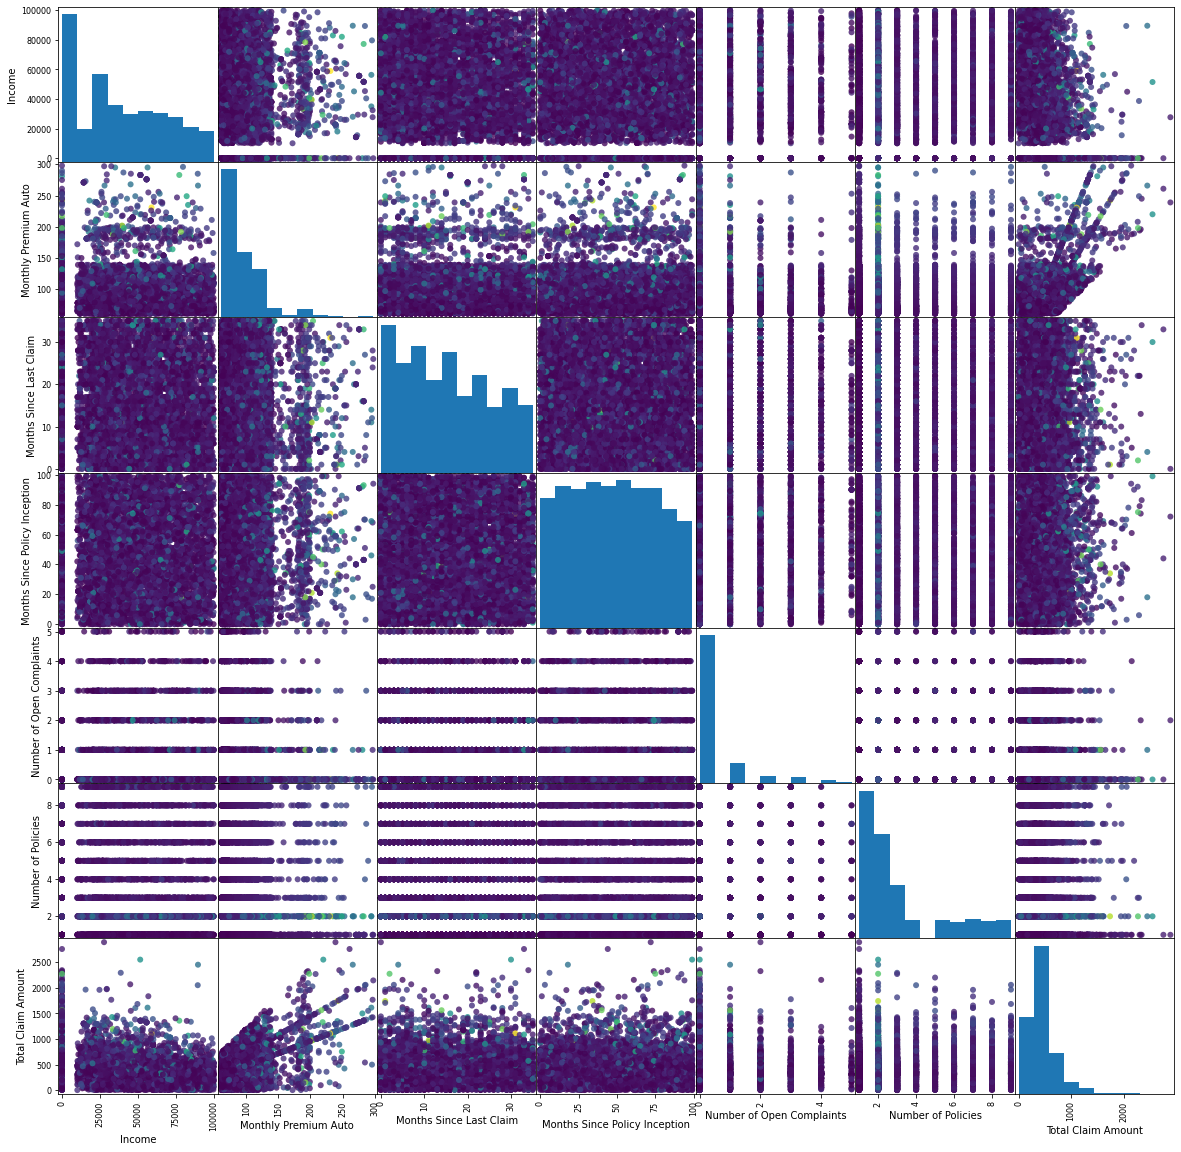

In [101]:
from pandas.plotting import scatter_matrix
attributes = ['Income','Monthly Premium Auto', 'Months Since Last Claim', 
              'Months Since Policy Inception', 'Number of Open Complaints',
              'Number of Policies', 'Total Claim Amount']
scatter_matrix(x[attributes], figsize = (20, 20), c = y, alpha = 0.8, marker = 'O')


In [102]:
x[attributes].describe()

Income  Monthly Premium Auto  Months Since Last Claim  \
count   9134.000000           9134.000000              9134.000000   
mean   37657.380009             93.219291                15.097000   
std    30379.904734             34.407967                10.073257   
min        0.000000             61.000000                 0.000000   
25%        0.000000             68.000000                 6.000000   
50%    33889.500000             83.000000                14.000000   
75%    62320.000000            109.000000                23.000000   
max    99981.000000            298.000000                35.000000   

       Months Since Policy Inception  Number of Open Complaints  \
count                    9134.000000                9134.000000   
mean                       48.064594                   0.384388   
std                        27.905991                   0.910384   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       Number of Policies  Total Claim Amount  
count         9134.000000         9134.000000  
mean             2.966170          434.088794  
std              2.390182          290.500092  
min              1.000000            0.099007  
25%              1.000000          272.258244  
50%              2.000000          383.945434  
75%              4.000000          547.514839  
max              9.000000         2893.239678

As we can clearly see that data for almost all the statistical varaibales is not normally distributed, hence we will use MinMaxScaller to scale the data

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



# Final Processed Train and Test Dataset

In [104]:
pd.DataFrame(x_train).head()

0    1         2         3         4         5    6      7         8   \
0  1.0  0.0  0.000000  0.173729  0.485714  0.919192  0.0  0.125  0.266080   
1  1.0  1.0  0.320335  0.038136  0.342857  0.585859  0.0  0.125  0.121717   
2  1.0  0.0  0.000000  0.072034  0.628571  0.989899  0.0  0.000  0.144336   
3  1.0  0.0  0.000000  0.016949  0.314286  0.696970  0.0  0.000  0.040502   
4  1.0  0.0  0.317514  0.042373  0.285714  0.292929  0.0  0.125  0.170230   

    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23  \
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   
2  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

    24   25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   

    39   40   41   42   43   44   45   46   47   48   49   50   51   52   53  \
0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   

    54   55   56  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0

In [105]:
pd.DataFrame(x_test).head()

0    1         2         3         4         5    6      7         8   \
0  1.0  1.0  0.622533  0.038136  0.371429  0.262626  0.0  0.500  0.121717   
1  1.0  1.0  0.000000  0.029661  0.285714  0.818182  0.0  0.000  0.177375   
2  1.0  0.0  0.533718  0.245763  0.114286  0.070707  0.0  0.625  0.206943   
3  1.0  0.0  0.276998  0.754237  0.000000  0.727273  0.4  0.000  1.048355   
4  1.0  0.0  0.000000  0.275424  0.428571  0.454545  0.0  0.000  0.328696   

    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23  \
0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   

    24   25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44   45   46   47   48   49   50   51   52   53  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

    54   55   56  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0


# Machine Learning Models

We will define a function that will give the Mean Absolute Error and Mean Squared Error. Additionally we will also be looking at R2 and Adjusted R2 which will explain how much variation in the output can be explained by the inputs.

In [106]:
def r2_score(Xtrain,Ytrain,Ytest) :
  SS_Residual = sum((Ytrain-Ytest)**2)
    #Sum squared total
  SS_Total = sum((Ytrain-np.mean(Ytrain))**2)
    #R2 value
  r2 = 1 - (float(SS_Residual))/SS_Total
    #Adjusted R2 value
  adjusted_r2 = 1 - (1-r2)*(len(Ytrain)-1)/(len(Ytrain)-Xtrain.shape[1]-1)
    
  return r2, adjusted_r2

Next We will define a function that will show th predictive performance for the test and train data points

In [107]:
def predictive_performance(ytrain, ytrain_pred, ytest, ytest_pred, size):
    
    fix ,axes = plt.subplots(ncols=2, figsize=size)

    m, b = np.polyfit(ytrain, ytrain_pred, 1) 
    axes[0].plot(ytrain, m*ytrain + b, color = 'red')        
    axes[0].scatter(ytrain, ytrain_pred, color = 'black')      
    axes[0].set_xlabel("Actual Data", fontsize=15)
    axes[0].set_ylabel("Predicted Value by Model", fontsize=15)
    axes[0].set_title("Train Data", fontsize=20)
    m1, b1 = np.polyfit(ytest, ytest_pred, 1)
    axes[1].plot(ytest, m1*ytest + b1, color = 'red')        
    axes[1].scatter(ytest, ytest_pred)      
    axes[1].set_xlabel("Actual Data", fontsize=15)
    axes[1].set_ylabel("Predicted Value by Model", fontsize=15)
    axes[1].set_title("Test Data", fontsize=20)

    return plt.show()


# Linear Regression

Train Cross-validation scores:
[0.15473028 0.17380903 0.1707789  0.18846139 0.19112351 0.16772015
 0.16307266 0.08458598 0.12268685 0.17219991]
Average Train Cross-validation score:0.15891686673189076


Test Cross-validation scores:
[-0.04070794  0.14292515  0.1378415   0.12920924  0.09592721  0.07251745
  0.0775667   0.07819531  0.03145555  0.12134611]
Average Test Cross-validation score:0.08462762657000142


Train Cross-validation scores:
[0.15473028 0.17380903 0.1707789  0.18846139 0.19112351 0.16772015
 0.16307266 0.08458598 0.12268685 0.17219991]
Average Train Cross-validation score:0.15891686673189076


Test Cross-validation scores:
[-0.04070794  0.14292515  0.1378415   0.12920924  0.09592721  0.07251745
  0.0775667   0.07819531  0.03145555  0.12134611]
Average Test Cross-validation score:0.08462762657000142


Model statistics:
Mean Absolute Error    3895.9590
Mean Squared Error     37114812.2763
R Square               0.1196
Adjusted R Square      0.0913




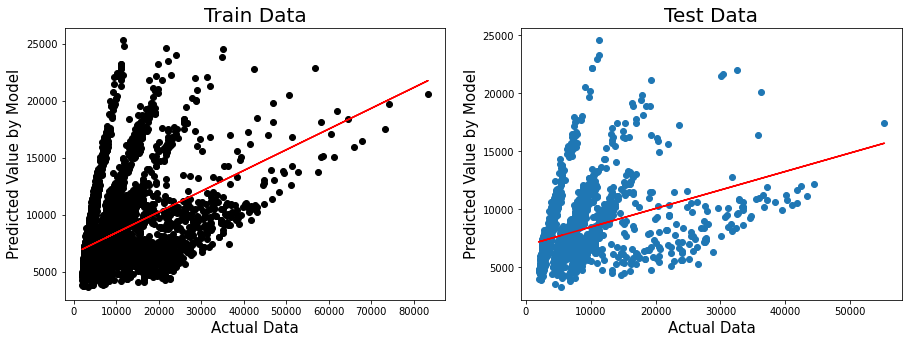

In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

kfold = KFold(n_splits=10)
train_scores = cross_val_score(lreg, x_train, y_train, cv=kfold, scoring = 'r2', n_jobs =-1)
test_scores = cross_val_score(lreg, x_test, y_test, cv=kfold, scoring = 'r2', n_jobs =-1)

print("Train Cross-validation scores:\n{}".format(train_scores))
print("Average Train Cross-validation score:{}".format(train_scores.mean()))
print('\n') 

print("Test Cross-validation scores:\n{}".format(test_scores))
print("Average Test Cross-validation score:{}".format(test_scores.mean())) 
print('\n') 



lreg = LinearRegression().fit(x_train, y_train)

pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)


mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

kfold = KFold(n_splits=10)
train_scores = cross_val_score(lreg, x_train, y_train, cv=kfold, scoring = 'r2', n_jobs =-1)
test_scores = cross_val_score(lreg, x_test, y_test, cv=kfold, scoring = 'r2', n_jobs =-1)

print("Train Cross-validation scores:\n{}".format(train_scores))
print("Average Train Cross-validation score:{}".format(train_scores.mean()))
print('\n') 

print("Test Cross-validation scores:\n{}".format(test_scores))
print("Average Test Cross-validation score:{}".format(test_scores.mean())) 
print('\n') 



lreg = LinearRegression().fit(x_train, y_train)

pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)


mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 


predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))



In [109]:
lreg.coef_

array([ 2.69620281e+02,  1.45730559e+02, -1.65583010e+02,  1.74059794e+04,
        4.46499310e+02, -7.39903955e+01, -1.05090763e+03,  3.78262382e+02,
       -9.97136068e+01, -5.73697188e+16, -5.73697188e+16, -5.73697188e+16,
        1.82659856e+17,  1.82659856e+17,  1.82659856e+17, -6.36880129e+16,
       -6.36880129e+16, -6.36880129e+16,  2.35406805e+17,  2.35406805e+17,
        2.35406805e+17, -1.19547753e+17, -3.27159742e+17, -1.15125894e+17,
        1.29482041e+17,  1.29482041e+17,  1.29482041e+17,  1.29482041e+17,
       -1.58552957e+17, -1.58552957e+17, -1.58552957e+17, -1.58552957e+17,
        1.05399187e+17,  1.05399187e+17,  1.05399187e+17,  1.05399187e+17,
        1.05399187e+17, -1.01730038e+17, -1.01730038e+17, -1.01730038e+17,
       -1.01730038e+17, -1.01730038e+17,  2.58223070e+17,  2.58223070e+17,
        2.58223070e+17,  2.58223070e+17,  2.58223070e+17,  2.58223070e+17,
        1.13945287e+16,  1.13945287e+16,  1.13945287e+16,  2.19006517e+17,
        2.19006517e+17,  

In [110]:
lreg.intercept_

-4.2167700774753446e+17

The above statistics shows the MSE and MAE and how my model predicts Customer Lifetime Value.


# KNN Regression



Grid Search with cross validation


In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,2,7,10,15], 
              'weights': ['distance', 'uniform']}
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1, scoring ='r2')
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 7, 10, 15],
                         'weights': ['distance', 'uniform']},
             return_train_score=True, scoring='r2', verbose=4)

In [112]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score: 0.14


The above code perfroms grid search from our randomly defined parameters to give us the best parameter for our KNN Model.

In [113]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007077      0.001153         0.210350        0.028430   
1       0.006192      0.000628         0.191693        0.016551   
2       0.006117      0.000241         0.211836        0.022074   
3       0.006188      0.000655         0.199687        0.006595   
4       0.005821      0.000473         0.288751        0.026002   

  param_n_neighbors param_weights                                     params  \
0                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
1                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
2                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
3                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -0.501153          -0.512165          -0.550986          -0.682243   
1          -0.501153          -0.512165          -0.550986          -0.682243   
2          -0.064226          -0.140283          -0.113901          -0.280596   
3          -0.060303          -0.138356          -0.103970          -0.270031   
4           0.143999           0.092418           0.107397           0.055916   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -0.528543        -0.555018        0.065790                9   
1          -0.528543        -0.555018        0.065790                9   
2          -0.123804        -0.144562        0.072593                8   
3          -0.114754        -0.137483        0.070945                7   
4           0.102614         0.100469        0.028275                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            0.619039            0.619017            0.619634   
4            1.000000            1.000000            1.000000   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            1.000000            1.000000          1.000000         0.000000  
1            1.000000            1.000000          1.000000         0.000000  
2            1.000000            1.000000          1.000000         0.000000  
3            0.639681            0.629301          0.625334         0.008168  
4            1.000000            1.000000          1.000000         0.000000

The above dataframe shows the results for each of our parameters and we can see that the best parameter is the one where weight is distance and the number of nearest neighbors is 15.

In [114]:
!pip install mglearn

     |████████████████████████████████| 540 kB 16.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3d99397370e0800e79e3fd33daa3a2ffe0a6d456fbc7af517cb60e77c29f5fe7
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


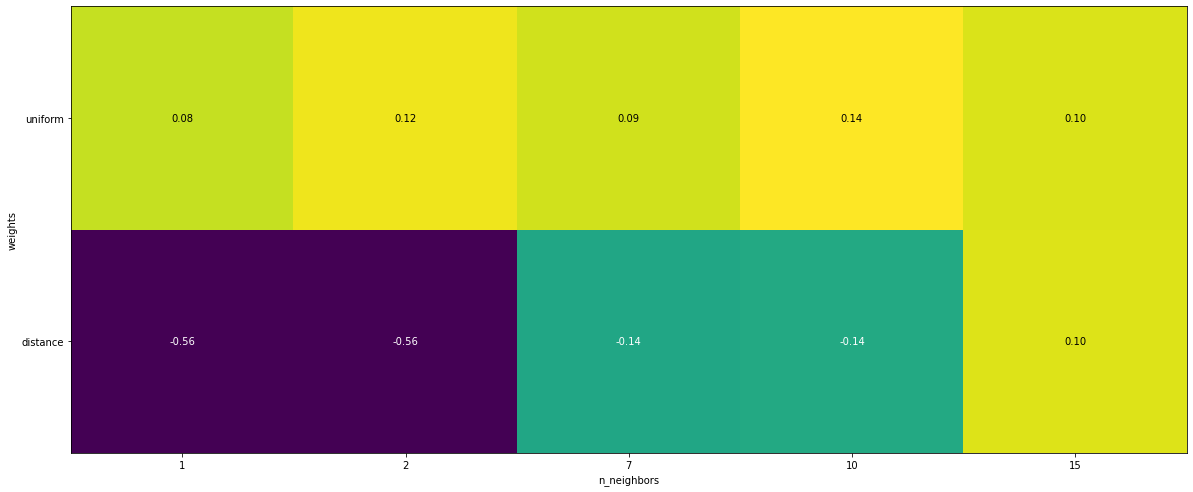

In [115]:
import mglearn
scores = np.array(results.mean_test_score).reshape(2, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='n_neighbors', 
                      xticklabels=param_grid['n_neighbors'], ylabel='weights', 
                      yticklabels=param_grid['weights'], cmap="viridis")

The above matrix shows the mean cross validation scores for all our parameters we input into the gridsearch and we can see the best one is for Weights = distance and n_neighbors = 15.

Now, I will go ahead and fit the model with the best parameters.

Model statistics:
Mean Absolute Error    3539.4870
Mean Squared Error     35194771.9482
R Square               0.1652
Adjusted R Square      0.1383




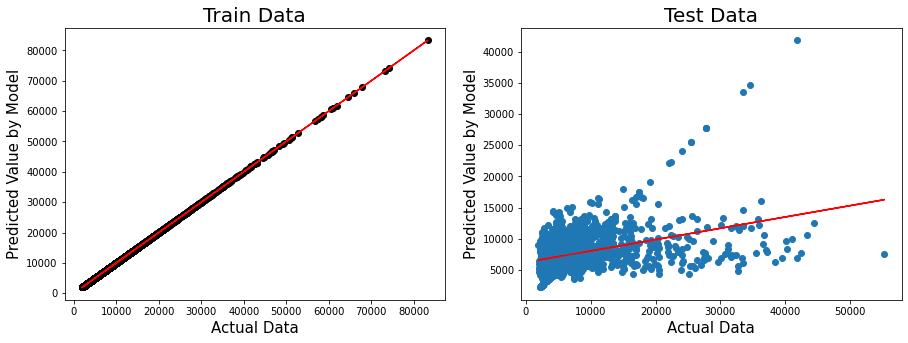

In [116]:
## fitting the model with best output
reg_knn = KNeighborsRegressor(weights = grid_search.best_params_['weights'], 
                              n_neighbors = grid_search.best_params_['n_neighbors'], n_jobs=-1).fit(x_train, y_train)

## output prediction
pred_train = reg_knn.predict(x_train)
pred_test = reg_knn.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))


# Ridge

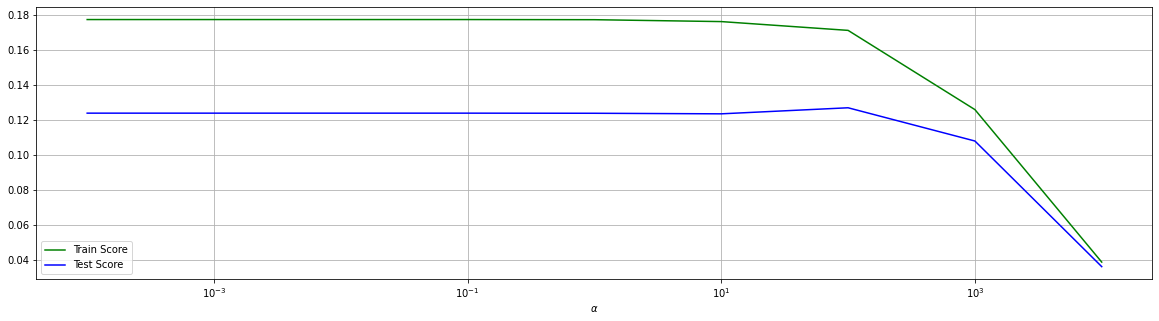

In [117]:
from sklearn.linear_model import Ridge

x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [118]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007077      0.001153         0.210350        0.028430   
1       0.006192      0.000628         0.191693        0.016551   
2       0.006117      0.000241         0.211836        0.022074   
3       0.006188      0.000655         0.199687        0.006595   
4       0.005821      0.000473         0.288751        0.026002   

  param_n_neighbors param_weights                                     params  \
0                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
1                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
2                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
3                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -0.501153          -0.512165          -0.550986          -0.682243   
1          -0.501153          -0.512165          -0.550986          -0.682243   
2          -0.064226          -0.140283          -0.113901          -0.280596   
3          -0.060303          -0.138356          -0.103970          -0.270031   
4           0.143999           0.092418           0.107397           0.055916   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -0.528543        -0.555018        0.065790                9   
1          -0.528543        -0.555018        0.065790                9   
2          -0.123804        -0.144562        0.072593                8   
3          -0.114754        -0.137483        0.070945                7   
4           0.102614         0.100469        0.028275                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            0.619039            0.619017            0.619634   
4            1.000000            1.000000            1.000000   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            1.000000            1.000000          1.000000         0.000000  
1            1.000000            1.000000          1.000000         0.000000  
2            1.000000            1.000000          1.000000         0.000000  
3            0.639681            0.629301          0.625334         0.008168  
4            1.000000            1.000000          1.000000         0.000000

In [119]:
ridge = Ridge()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [120]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.16


Model statistics:
Mean Absolute Error    3848.8676
Mean Squared Error     36930084.5619
R Square               0.1240
Adjusted R Square      0.0958




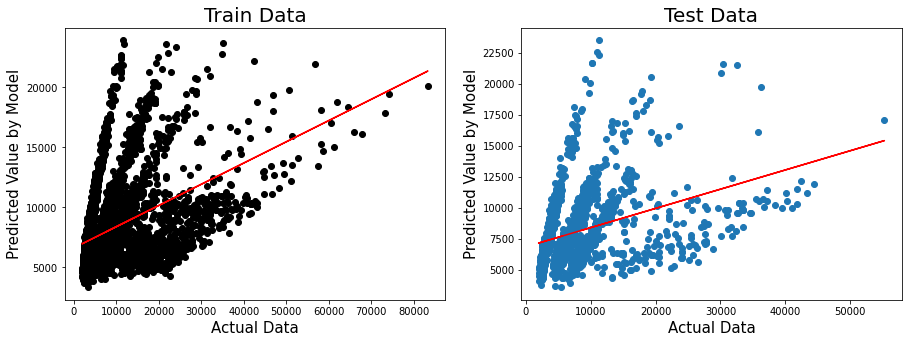

In [121]:
## fitting the model with best output
r_ridge = Ridge(alpha = grid_search.best_params_['alpha']).fit(x_train, y_train)

## output prediction
pred_train = r_ridge.predict(x_train)
pred_test = r_ridge.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))


# Lasso

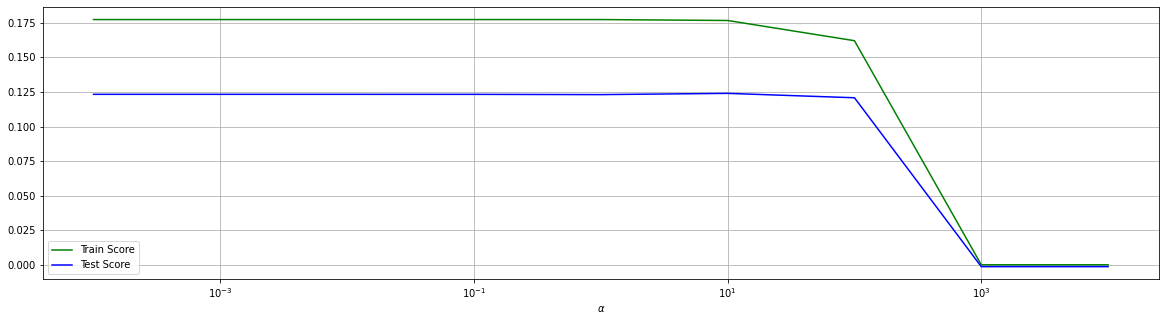

In [122]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, tol=1)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [123]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.017210      0.003903         0.001282        0.000390      0.0001   
1       0.012982      0.003467         0.001130        0.000190       0.001   
2       0.013053      0.002526         0.001082        0.000062        0.01   
3       0.014852      0.003414         0.001082        0.000106         0.1   
4       0.014379      0.004447         0.002077        0.001975           1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.168823           0.179767           0.184227   
1   {'alpha': 0.001}           0.168822           0.179767           0.184228   
2    {'alpha': 0.01}           0.168813           0.179766           0.184231   
3     {'alpha': 0.1}           0.168725           0.179760           0.184261   
4       {'alpha': 1}           0.167965           0.179595           0.184399   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.125782           0.147285         0.161177        0.021823   
1           0.125783           0.147285         0.161177        0.021822   
2           0.125799           0.147284         0.161179        0.021817   
3           0.125951           0.147270         0.161193        0.021769   
4           0.127069           0.147094         0.161224        0.021383   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.177851            0.174834   
1                4            0.177851            0.174834   
2                3            0.177851            0.174834   
3                2            0.177850            0.174833   
4                1            0.177773            0.174718   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.173631            0.185642            0.183439   
1            0.173631            0.185642            0.183439   
2            0.173631            0.185642            0.183439   
3            0.173629            0.185640            0.183438   
4            0.173504            0.185497            0.183334   

   mean_train_score  std_train_score  
0          0.179080         0.004718  
1          0.179080         0.004718  
2          0.179080         0.004718  
3          0.179078         0.004718  
4          0.178965         0.004712

In [124]:
lasso = Lasso(tol=1)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(tol=1), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [125]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.16


Model statistics:
Mean Absolute Error    3837.1633
Mean Squared Error     36837066.7760
R Square               0.1262
Adjusted R Square      0.0981




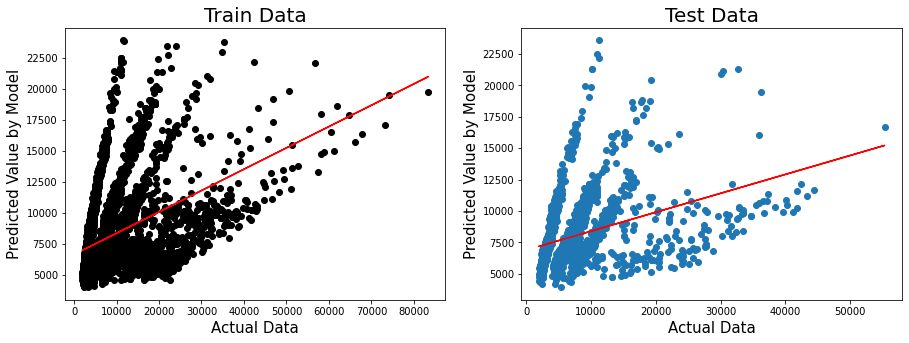

In [126]:
## fitting the model with best output
r_lasso = Lasso(alpha = grid_search.best_params_['alpha']).fit(x_train, y_train)

## output prediction
pred_train = r_lasso.predict(x_train)
pred_test = r_lasso.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))


# Decision Tree Regression

In [127]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[50, 100, 200, 300, 500, 1000],
              'min_samples_split':[100, 200, 300, 400, 500], 
              'min_samples_leaf':[1,2,3,4,5],
              'max_leaf_nodes':[1,2,3,4,5, None],
              'max_features' : ["auto", "sqrt", "log2"]}

clf = DecisionTreeRegressor()
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1)

In [128]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 200, 300, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [100, 200, 300, 400, 500]},
             return_train_score=True, verbose=4)

In [129]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 200}
Best cross-validation score: 0.67


In [130]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.009705      0.005171              0.0             0.0   
1       0.006472      0.001792              0.0             0.0   
2       0.006997      0.002797              0.0             0.0   
3       0.006100      0.001492              0.0             0.0   
4       0.007042      0.002204              0.0             0.0   

  param_max_depth param_max_features param_max_leaf_nodes  \
0              50               auto                    1   
1              50               auto                    1   
2              50               auto                    1   
3              50               auto                    1   
4              50               auto                    1   

  param_min_samples_leaf param_min_samples_split  \
0                      1                     100   
1                      1                     200   
2                      1                     300   
3                      1                     400   
4                      1                     500   

                                              params  split0_test_score  \
0  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   
1  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   
2  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   
3  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   
4  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN             2700                 NaN   
1              NaN             NaN             2382                 NaN   
2              NaN             NaN             2383                 NaN   
3              NaN             NaN             2384                 NaN   
4              NaN             NaN             2386                 NaN   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1                 NaN               NaN              NaN  
2                 NaN               NaN              NaN  
3                 NaN               NaN              NaN  
4                 NaN               NaN              NaN

Model statistics:
Mean Absolute Error    1651.8883
Mean Squared Error     14555286.5703
R Square               0.6547
Adjusted R Square      0.6436




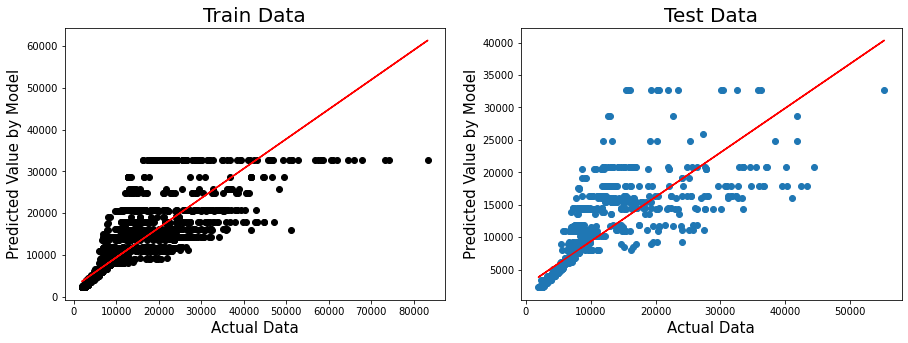

In [131]:
r_dec= DecisionTreeRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(x_train, y_train)

## output prediction
pred_train = r_dec.predict(x_train)
pred_test = r_dec.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))


# Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[300],
              'min_samples_split':[100], 
              'min_samples_leaf':[2],
              'max_leaf_nodes':[None],
              'max_features' : ["auto"]
              }

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [133]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [300], 'max_features': ['auto'],
                         'max_leaf_nodes': [None], 'min_samples_leaf': [2],
                         'min_samples_split': [100]},
             return_train_score=True, scoring='r2', verbose=4)

In [134]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 300, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 100}
Best cross-validation score: 0.69


In [135]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.531919      1.054606         0.087137        0.024041   

  param_max_depth param_max_features param_max_leaf_nodes  \
0             300               auto                 None   

  param_min_samples_leaf param_min_samples_split  \
0                      2                     100   

                                              params  split0_test_score  \
0  {'max_depth': 300, 'max_features': 'auto', 'ma...            0.68856   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.690573           0.690721           0.697232           0.692348   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.691887         0.00293                1            0.735079   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.736271            0.734371            0.728261   

   split4_train_score  mean_train_score  std_train_score  
0            0.729948          0.732786         0.003113

Model statistics:
Mean Absolute Error    1575.3842
Mean Squared Error     13636407.5503
R Square               0.6765
Adjusted R Square      0.6661




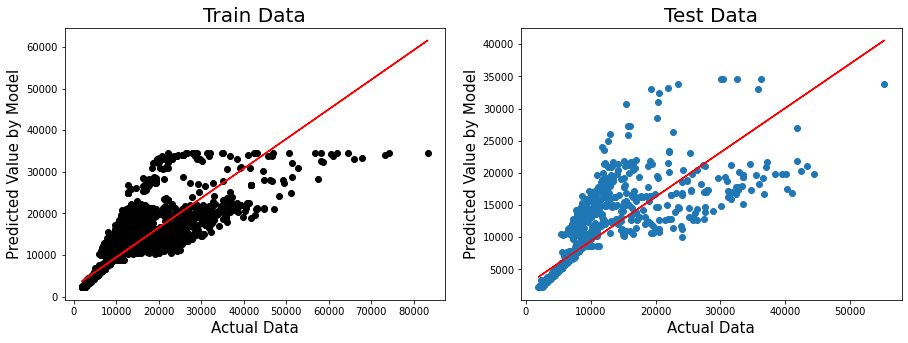

In [136]:
r_rand= RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(x_train, y_train)

## output prediction
pred_train = r_rand.predict(x_train)
pred_test = r_rand.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Bagging : 

Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees.

### Decision Tree Regressor with  Bagging : 



Mean Absolute Error    1730.7570
Mean Squared Error     13730353.6430
R Square               0.6743
Adjusted R Square      0.6638


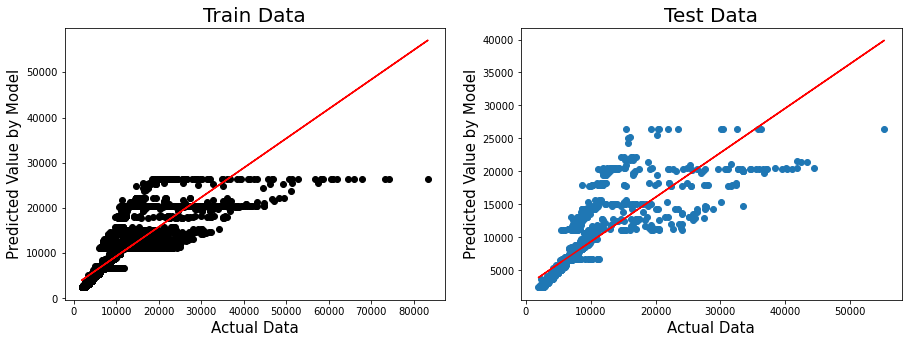

In [137]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf_bag_r = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = 50, max_features = 'auto', 
                                                                  max_leaf_nodes = None, min_samples_leaf = 2, 
                                                                  min_samples_split = 500, random_state = 42), bootstrap = True, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

### Bagging with Random Forest Regressor :

Mean Absolute Error    1611.7470
Mean Squared Error     13660128.2132
R Square               0.6760
Adjusted R Square      0.6655


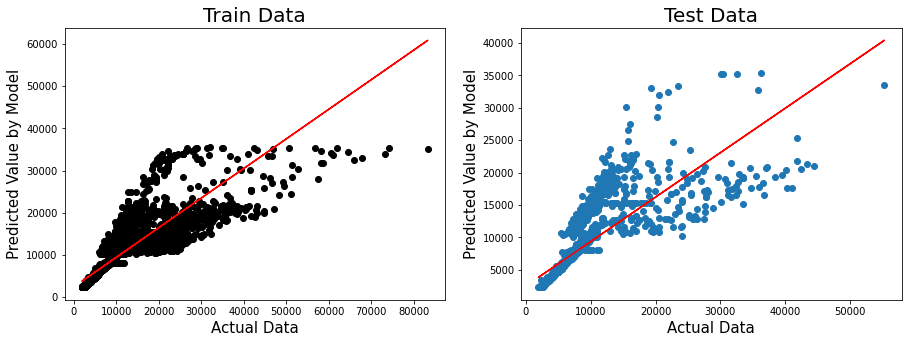

In [138]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

clf_bag_r = BaggingRegressor(base_estimator=RandomForestRegressor(max_depth = 300, 
                             min_samples_split = 100, 
                             max_leaf_nodes = None,
                             min_samples_leaf = 2,
                             max_features = 'auto', n_jobs=-1, random_state = 0), bootstrap = True, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

## Pasting :

When sampling is performed without replacement, it is called pasting. In other words, both approaches are similar. In both cases you are sampling the training data to build multiple instances of a classifier.


### Pasting with Decision Tree Regressor :

Mean Absolute Error    1753.5898
Mean Squared Error     14587699.9986
R Square               0.6540
Adjusted R Square      0.6428


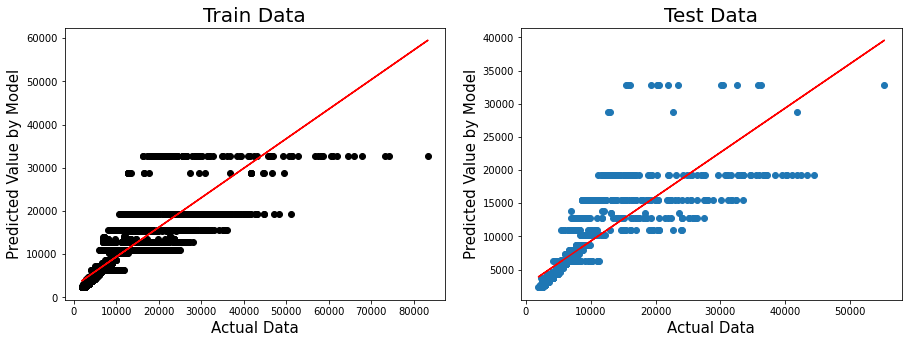

In [139]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf_bag_r = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = 50, max_features = 'auto', 
                                                                  max_leaf_nodes = None, min_samples_leaf = 2, 
                                                                  min_samples_split = 500, random_state = 42), bootstrap = False, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

### Pasting with Random Forest Regressor :

Mean Absolute Error    1572.4772
Mean Squared Error     13530695.5880
R Square               0.6790
Adjusted R Square      0.6687


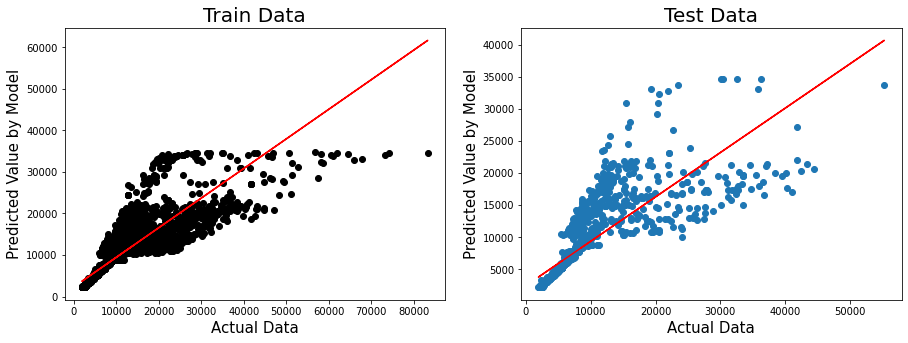

In [140]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

clf_bag_r = BaggingRegressor(base_estimator=RandomForestRegressor(max_depth = 300, 
                             min_samples_split = 100, 
                             max_leaf_nodes = None,
                             min_samples_leaf = 2,
                             max_features = 'auto', n_jobs=-1, random_state = 0), bootstrap = False, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

### Boosting : 

In machine learning, boosting is an algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.

### AdaBoost on Decision Tree Regressor :

Mean Absolute Error    1754.0661
Mean Squared Error     14288346.1287
R Square               0.6611
Adjusted R Square      0.6502


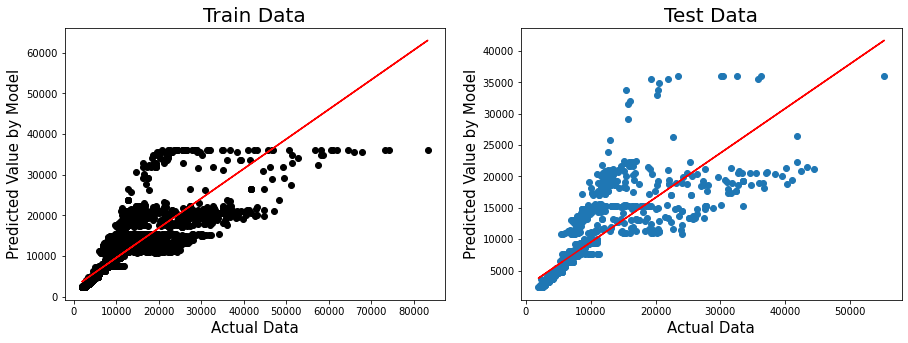

In [141]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

clf_bag_r = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth = 50, max_features = 'auto', 
                                                                  max_leaf_nodes = None, min_samples_leaf = 2, 
                                                                  min_samples_split = 500, random_state = 42), learning_rate=0.01, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

### AdaBoost on Random Forest Regressor :

Mean Absolute Error    1621.4332
Mean Squared Error     13652963.2078
R Square               0.6761
Adjusted R Square      0.6657


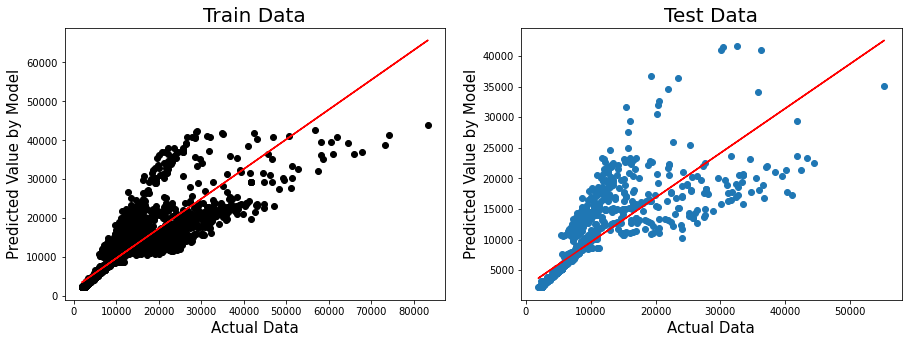

In [142]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

clf_ab_r = AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth = 300, 
                             min_samples_split = 100, 
                             max_leaf_nodes = None,
                             min_samples_leaf = 2,
                             max_features = 'auto', n_jobs=-1, random_state = 0), learning_rate=0.01, n_estimators = 100)
clf_ab_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_ab_r.predict(x_train)
ypred_te = clf_ab_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

## Gradient Boosting :

Mean Absolute Error    1680.8471
Mean Squared Error     14308694.4987
R Square               0.6606
Adjusted R Square      0.6497


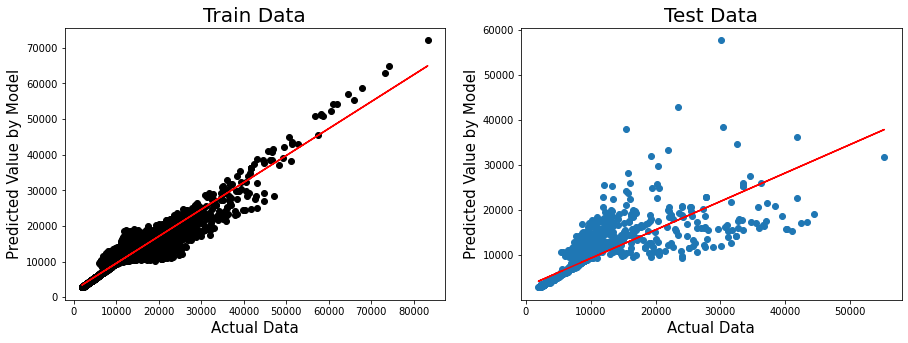

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

clf_bag_r = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, subsample=1.0, min_samples_split=3, min_samples_leaf=1, max_depth=10)
clf_bag_r.fit(x_train, y_train)
## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

## Principle Component Analysis :

PCA forms the basis of multivariate data analysis based on projection methods. The most important use of PCA is to represent a multivariate data table as smaller set of variables (summary indices) in order to observe trends, jumps, clusters and outliers. This overview may uncover the relationships between observations and variables, and among the variables.



In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

## getting components
train_comp = pca.fit_transform(x_train)
test_comp = pca.transform(x_test)

## creating train dataframe
train_df = pd.DataFrame(data = train_comp)
train_df.head()

0         1         2         3         4         5         6   \
0  1.613505 -0.562007  0.469440 -0.331829 -0.556094  0.570774  0.334257   
1  0.546669 -0.250765 -0.537993 -0.299234 -0.363567  0.511790  0.958614   
2  0.784515 -0.585310  0.924021  0.126735 -0.185508 -0.537894  0.616198   
3  0.242938 -0.238566 -0.444302 -0.512093 -0.724531 -1.081683  0.532147   
4  0.038380 -0.588203 -0.709398  0.510263  0.438172  0.225379  0.600712   

         7         8         9         10        11        12        13  \
0 -0.425886  0.526507 -0.509012 -0.415513 -0.322536 -0.364414 -0.278097   
1  0.996819  0.255329  1.073424 -0.070975  0.404518 -0.022220  0.704269   
2 -0.264914 -1.019746 -0.631268  0.170498 -0.613290 -0.056530 -0.435185   
3 -0.767787  0.111654  0.762108 -0.346896 -0.195135 -0.342037 -0.414138   
4  0.124229  1.380982 -0.344165 -0.339056 -0.498182 -0.532824  0.819906   

         14        15        16        17        18        19        20  \
0  0.001250  0.492322  0.059254 -0.132021 -0.266034  0.151976  1.004545   
1 -0.084465  0.133780  0.337119 -0.846049 -0.527315 -0.127247 -0.159613   
2 -0.120001  0.263685 -0.009382  0.255292 -0.045519 -0.071608 -0.124421   
3 -0.201576  0.228433 -0.983770  1.003722 -0.150433 -0.207106 -0.848394   
4 -0.915165 -0.443502 -0.013843  0.334600 -0.207827 -0.319180 -0.859214   

         21        22        23        24        25        26        27  \
0  0.223747  1.008002 -0.197632  0.115843 -0.153840 -0.193296  0.097646   
1 -0.103887 -0.262545  0.022619 -0.011960 -0.127196 -0.157688 -0.080424   
2 -0.123182 -0.149931  0.561574  0.857266 -0.332775 -0.316258 -0.225631   
3  0.132561  0.679802  0.018588 -0.301661 -0.129818 -0.076586  0.283884   
4  0.110624  0.486079  0.024783 -0.129660  0.024030  0.067335  0.169671   

         28        29        30        31  
0 -0.055816  0.039056  0.255337 -0.262437  
1 -0.013846 -0.015933  0.017618  0.020950  
2 -0.351919  0.198526  0.068647 -0.259023  
3 -0.213265  0.138552  0.113261 -0.084727  
4  0.006787  0.076237 -0.168908 -0.006889

In [145]:
## creating test dataframe
test_df = pd.DataFrame(data = test_comp)
test_df.head()

0         1         2         3         4         5         6   \
0 -0.125488 -0.212885 -0.364438 -0.390556  0.332995  0.169558 -0.470332   
1  1.360645  1.202398 -0.567963 -0.622701  0.583726 -0.632511 -0.099217   
2 -0.050470 -0.614265  0.349895  0.398681 -0.080703  0.429214  1.612651   
3  0.110488 -0.270568  0.565974  0.946507  0.315112 -0.479306 -0.581324   
4  1.467343 -0.164777  0.711199  0.658790  0.339558  0.449502 -0.028757   

         7         8         9         10        11        12        13  \
0 -0.623897  0.784106  0.762730 -0.596927  0.373146  0.078631  0.211426   
1  0.876893 -0.132422 -0.207007 -0.178233  0.632023 -0.287678  0.207377   
2 -0.461048  0.122922 -0.491001 -0.051769 -0.893520  0.169088 -0.009293   
3  0.457110 -0.940542  0.608696 -0.889718 -0.229695  0.118217  0.310371   
4 -0.402969  0.890396  0.309615 -0.783095 -0.041116 -0.862330 -0.069802   

         14        15        16        17        18        19        20  \
0 -0.490404 -1.522261 -0.279238  0.386019 -0.391143 -0.328889  0.062891   
1 -0.756588  0.079735  0.361895 -0.480010 -0.249849 -0.282096 -0.039106   
2  0.039113  0.000003  0.162705 -0.527768 -0.201610  0.233542  0.282232   
3  0.079165  0.091995 -0.106620  0.279805 -0.119903  0.985498 -0.038456   
4  0.759575  0.126891 -0.116153 -0.129587  1.013323 -0.066367 -0.882977   

         21        22        23        24        25        26        27  \
0 -0.208066 -0.114361 -0.467348  0.228943  0.075631  0.220787  0.173295   
1  0.019310 -0.008959  0.011659  0.036298 -0.757924  0.123185  0.121823   
2 -0.712468  0.591677 -0.070655 -0.079987  0.296322  0.099127  0.346591   
3 -0.054834 -0.143463 -0.071391 -0.009573 -0.306844 -0.421659 -0.077374   
4  0.397049  0.498516  0.254289 -0.264297  0.091554 -0.073489  0.080146   

         28        29        30        31  
0  0.053243  0.006159 -0.221289 -0.045127  
1 -0.393629 -0.421147 -0.061166 -0.037730  
2  0.324376 -0.035972 -0.492758  0.054535  
3  0.484759 -0.368391  0.505335  0.657302  
4 -0.134657 -0.060933  0.069062 -0.157661

Now, I will repeat all models with PCA to check if it improves model performance.

### Linear Regression with PCA :

Train Cross-validation scores:
[0.1299117  0.11415621 0.11604887 0.13255946 0.15323405 0.13564338
 0.15875986 0.09261638 0.10453944 0.12826364]
Average Train Cross-validation score:0.1265732977805934


Test Cross-validation scores:
[0.15141806 0.15269979 0.11870361 0.1060695  0.09963737 0.04655877
 0.07762451 0.09834278 0.0222382  0.10162664]
Average Test Cross-validation score:0.09749192437744408


Model statistics:
Mean Absolute Error    3948.6107
Mean Squared Error     37618124.5201
R Square               0.1077
Adjusted R Square      0.0918




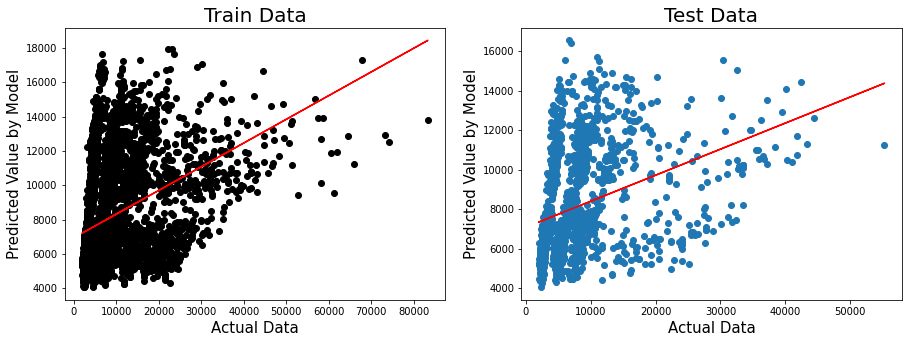

In [146]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

kfold = KFold(n_splits=10)
train_scores = cross_val_score(lreg, train_df, y_train, cv=kfold, scoring = 'r2', n_jobs =-1)
test_scores = cross_val_score(lreg, test_df, y_test, cv=kfold, scoring = 'r2', n_jobs =-1)

print("Train Cross-validation scores:\n{}".format(train_scores))
print("Average Train Cross-validation score:{}".format(train_scores.mean()))
print('\n') 

print("Test Cross-validation scores:\n{}".format(test_scores))
print("Average Test Cross-validation score:{}".format(test_scores.mean())) 
print('\n') 



lreg = LinearRegression().fit(train_df, y_train)

pred_train = lreg.predict(train_df)
pred_test = lreg.predict(test_df)


mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 


predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

## KNN Regression with PCA :

In [147]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,2,7,10,15], 
              'weights': ['distance', 'uniform']}
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1, scoring ='r2')
grid_search.fit(train_df, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score: 0.12


In [148]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006475      0.001561         0.271881        0.130049   
1       0.005545      0.000354         0.183410        0.016728   
2       0.005325      0.000499         0.189668        0.007873   
3       0.005216      0.000326         0.203439        0.011497   
4       0.005451      0.000430         0.267574        0.010705   

  param_n_neighbors param_weights                                     params  \
0                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
1                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
2                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
3                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -0.566706          -0.759996          -0.543625          -0.955399   
1          -0.566706          -0.759996          -0.543625          -0.955399   
2          -0.122715          -0.230429          -0.148126          -0.361591   
3          -0.122648          -0.225861          -0.144296          -0.339800   
4           0.103339           0.054668           0.097898           0.035781   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -0.466938        -0.658533        0.177070                9   
1          -0.466938        -0.658533        0.177070                9   
2          -0.208723        -0.214317        0.083370                8   
3          -0.218774        -0.210276        0.076320                7   
4           0.050244         0.068386        0.027104                4   

   split0_train_score  split1_train_score  split2_train_score  \
0            1.000000             1.00000            1.000000   
1            1.000000             1.00000            1.000000   
2            1.000000             1.00000            1.000000   
3            0.601324             0.59797            0.600509   
4            1.000000             1.00000            1.000000   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            1.000000            1.000000          1.000000     0.000000e+00  
1            1.000000            1.000000          1.000000     0.000000e+00  
2            1.000000            1.000000          1.000000     4.965068e-17  
3            0.616102            0.580964          0.599374     1.118783e-02  
4            1.000000            1.000000          1.000000     1.216188e-16

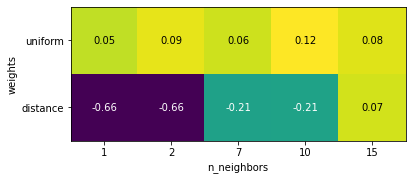

In [149]:
import mglearn
scores = np.array(results.mean_test_score).reshape(2, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='n_neighbors', 
                      xticklabels=param_grid['n_neighbors'], ylabel='weights', 
                      yticklabels=param_grid['weights'], cmap="viridis")

Model statistics:
Mean Absolute Error    3630.9857
Mean Squared Error     35680944.9166
R Square               0.1536
Adjusted R Square      0.1385




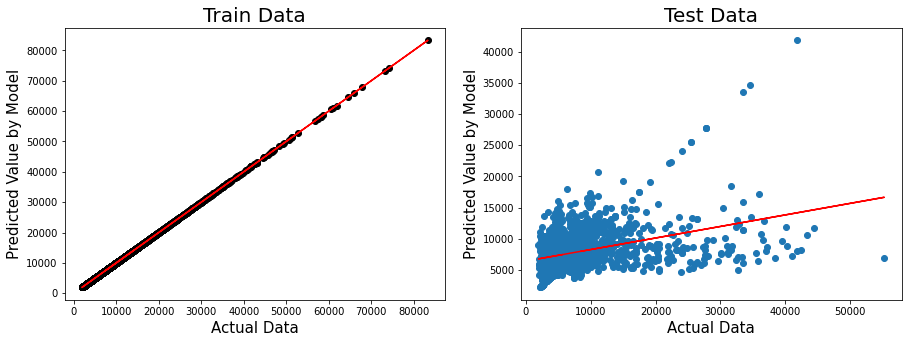

In [150]:
## fitting the model with best output
reg_knn = KNeighborsRegressor(weights = grid_search.best_params_['weights'], 
                              n_neighbors = grid_search.best_params_['n_neighbors'], n_jobs=-1).fit(train_df, y_train)

## output prediction
pred_train = reg_knn.predict(train_df)
pred_test = reg_knn.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Ridge with PCA :

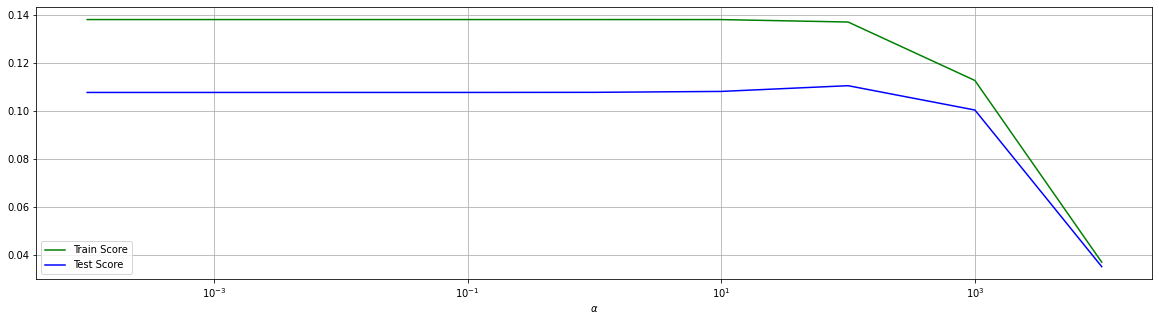

In [151]:
from sklearn.linear_model import Ridge

x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(train_df,y_train)
    train_score_list.append(ridge.score(train_df,y_train))
    test_score_list.append(ridge.score(test_df, y_test))
    
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [152]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006475      0.001561         0.271881        0.130049   
1       0.005545      0.000354         0.183410        0.016728   
2       0.005325      0.000499         0.189668        0.007873   
3       0.005216      0.000326         0.203439        0.011497   
4       0.005451      0.000430         0.267574        0.010705   

  param_n_neighbors param_weights                                     params  \
0                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
1                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
2                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
3                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -0.566706          -0.759996          -0.543625          -0.955399   
1          -0.566706          -0.759996          -0.543625          -0.955399   
2          -0.122715          -0.230429          -0.148126          -0.361591   
3          -0.122648          -0.225861          -0.144296          -0.339800   
4           0.103339           0.054668           0.097898           0.035781   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0          -0.466938        -0.658533        0.177070                9   
1          -0.466938        -0.658533        0.177070                9   
2          -0.208723        -0.214317        0.083370                8   
3          -0.218774        -0.210276        0.076320                7   
4           0.050244         0.068386        0.027104                4   

   split0_train_score  split1_train_score  split2_train_score  \
0            1.000000             1.00000            1.000000   
1            1.000000             1.00000            1.000000   
2            1.000000             1.00000            1.000000   
3            0.601324             0.59797            0.600509   
4            1.000000             1.00000            1.000000   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            1.000000            1.000000          1.000000     0.000000e+00  
1            1.000000            1.000000          1.000000     0.000000e+00  
2            1.000000            1.000000          1.000000     4.965068e-17  
3            0.616102            0.580964          0.599374     1.118783e-02  
4            1.000000            1.000000          1.000000     1.216188e-16

In [153]:
ridge = Ridge()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(train_df, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [154]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.13


Model statistics:
Mean Absolute Error    3947.9248
Mean Squared Error     37600160.2443
R Square               0.1081
Adjusted R Square      0.0922




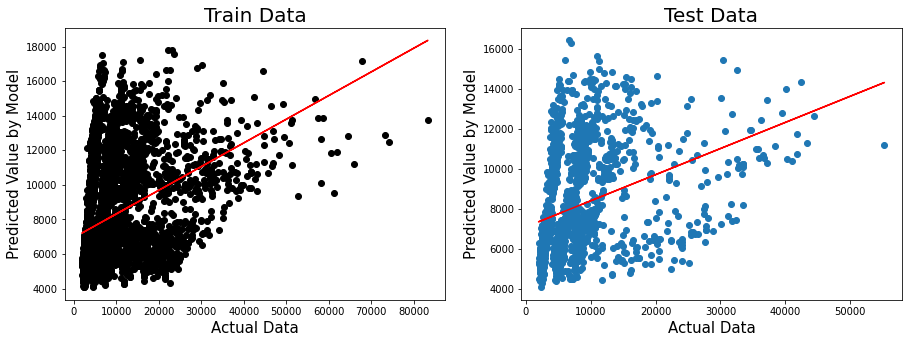

In [155]:
## fitting the model with best output
r_ridge = Ridge(alpha = grid_search.best_params_['alpha']).fit(train_df, y_train)

## output prediction
pred_train = r_ridge.predict(train_df)
pred_test = r_ridge.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(train_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Lasso with PCA :

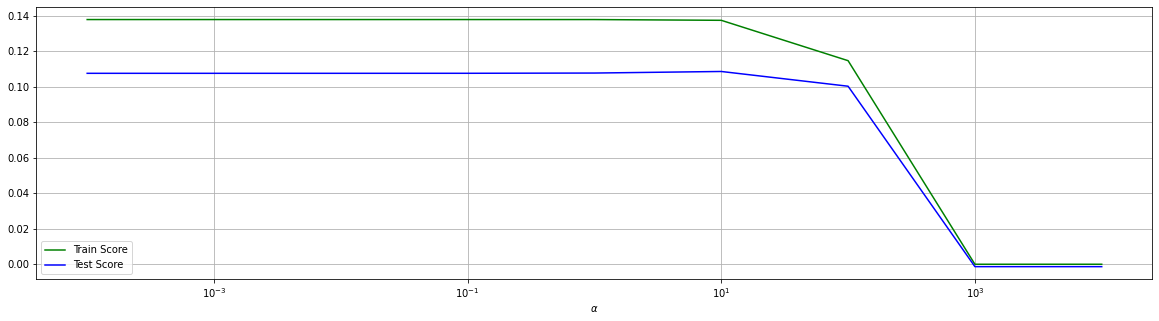

In [156]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, tol=1)
    lasso.fit(train_df,y_train)
    train_score_list.append(lasso.score(train_df,y_train))
    test_score_list.append(lasso.score(test_df, y_test))

%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [157]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009553      0.001473         0.003500        0.000656      0.0001   
1       0.007619      0.000271         0.003287        0.000172       0.001   
2       0.009204      0.003487         0.003103        0.000172        0.01   
3       0.007685      0.000327         0.003047        0.000114         0.1   
4       0.012622      0.005396         0.003106        0.000115           1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.119272           0.124324           0.147537   
1   {'alpha': 0.001}           0.119272           0.124324           0.147537   
2    {'alpha': 0.01}           0.119272           0.124324           0.147537   
3     {'alpha': 0.1}           0.119273           0.124326           0.147535   
4       {'alpha': 1}           0.119277           0.124342           0.147512   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.129235           0.115890         0.127252        0.011106   
1           0.129235           0.115890         0.127252        0.011106   
2           0.129235           0.115891         0.127252        0.011106   
3           0.129238           0.115894         0.127253        0.011105   
4           0.129263           0.115927         0.127264        0.011089   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.141223            0.139839   
1                5            0.141223            0.139839   
2                4            0.141223            0.139839   
3                3            0.141223            0.139839   
4                2            0.141223            0.139839   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.133961            0.138307             0.14208   
1            0.133961            0.138307             0.14208   
2            0.133961            0.138307             0.14208   
3            0.133961            0.138307             0.14208   
4            0.133961            0.138307             0.14208   

   mean_train_score  std_train_score  
0          0.139082         0.002863  
1          0.139082         0.002863  
2          0.139082         0.002863  
3          0.139082         0.002863  
4          0.139082         0.002863

In [158]:
lasso = Lasso(tol=1)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(train_df, y_train)

GridSearchCV(cv=5, estimator=Lasso(tol=1), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [159]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.13


Model statistics:
Mean Absolute Error    3938.9290
Mean Squared Error     37574392.7912
R Square               0.1087
Adjusted R Square      0.0928




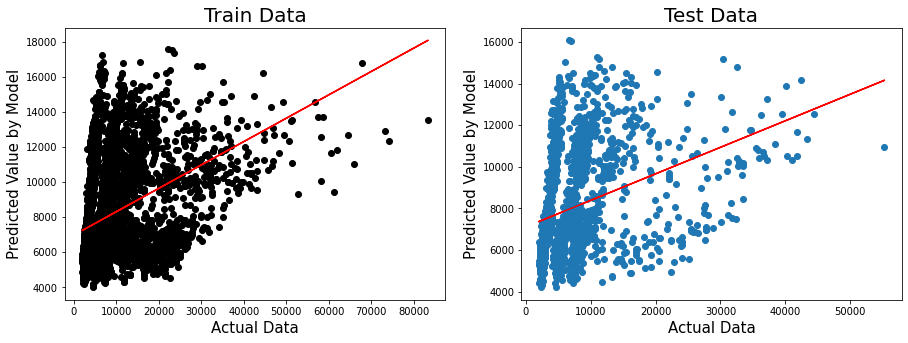

In [160]:
## fitting the model with best output
r_lasso = Lasso(alpha = grid_search.best_params_['alpha']).fit(train_df, y_train)

## output prediction
pred_train = r_lasso.predict(train_df)
pred_test = r_lasso.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Decision Tree Regressor with PCA :

In [161]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[50, 100, 200, 300, 500, 1000],
              'min_samples_split':[100, 200, 300, 400, 500], 
              'min_samples_leaf':[1,2,3,4,5],
              'max_leaf_nodes':[1,2,3,4,5, None],
              'max_features' : ["auto", "sqrt", "log2"]}

clf = DecisionTreeRegressor()
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1)
grid_search.fit(train_df, y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 200, 300, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [100, 200, 300, 400, 500]},
             return_train_score=True, verbose=4)

In [162]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 1000, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 500}
Best cross-validation score: 0.12


In [163]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006414      0.000757              0.0             0.0   
1       0.009914      0.003703              0.0             0.0   
2       0.005703      0.001135              0.0             0.0   
3       0.007137      0.002295              0.0             0.0   
4       0.005417      0.001331              0.0             0.0   

  param_max_depth param_max_features param_max_leaf_nodes  \
0              50               auto                    1   
1              50               auto                    1   
2              50               auto                    1   
3              50               auto                    1   
4              50               auto                    1   

  param_min_samples_leaf param_min_samples_split  \
0                      1                     100   
1                      1                     200   
2                      1                     300   
3                      1                     400   
4                      1                     500   

                                              params  split0_test_score  \
0  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   
1  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   
2  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   
3  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   
4  {'max_depth': 50, 'max_features': 'auto', 'max...                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN             2700                 NaN   
1              NaN             NaN             2265                 NaN   
2              NaN             NaN             2267                 NaN   
3              NaN             NaN             2268                 NaN   
4              NaN             NaN             2269                 NaN   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1                 NaN               NaN              NaN  
2                 NaN               NaN              NaN  
3                 NaN               NaN              NaN  
4                 NaN               NaN              NaN

Model statistics:
Mean Absolute Error    4029.6406
Mean Squared Error     40367935.4474
R Square               0.0425
Adjusted R Square      0.0254




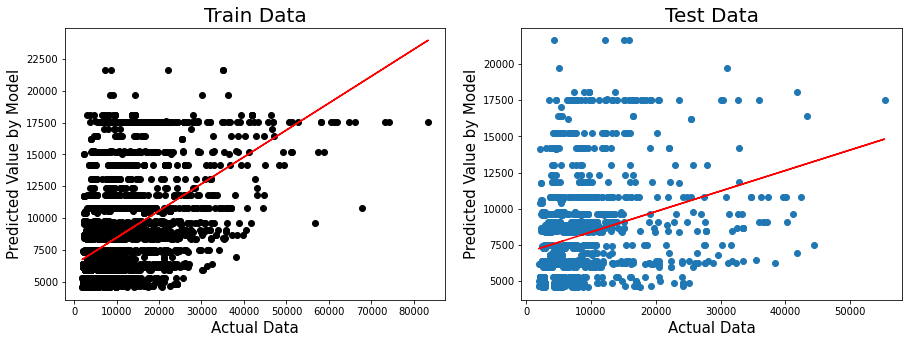

In [164]:
r_dec= DecisionTreeRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(train_df, y_train)

## output prediction
pred_train = r_dec.predict(train_df)
pred_test = r_dec.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Random Forest Regressor With PCA :

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[500],
              'min_samples_split':[300], 
              'min_samples_leaf':[5],
              'max_leaf_nodes':[5],
              'max_features' : ["auto"]
              }

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=3, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)
grid_search.fit(train_df, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [500], 'max_features': ['auto'],
                         'max_leaf_nodes': [5], 'min_samples_leaf': [5],
                         'min_samples_split': [300]},
             return_train_score=True, scoring='r2', verbose=4)

In [166]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 500, 'max_features': 'auto', 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 300}
Best cross-validation score: 0.11


In [167]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        5.28536      0.668879         0.022186        0.004471   

  param_max_depth param_max_features param_max_leaf_nodes  \
0             500               auto                    5   

  param_min_samples_leaf param_min_samples_split  \
0                      5                     300   

                                              params  split0_test_score  \
0  {'max_depth': 500, 'max_features': 'auto', 'ma...           0.097656   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.140569           0.104929         0.114385        0.018751   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.138556            0.120296   

   split2_train_score  mean_train_score  std_train_score  
0            0.140086          0.132979          0.00899

Model statistics:
Mean Absolute Error    4028.0198
Mean Squared Error     38861797.7144
R Square               0.0782
Adjusted R Square      0.0617




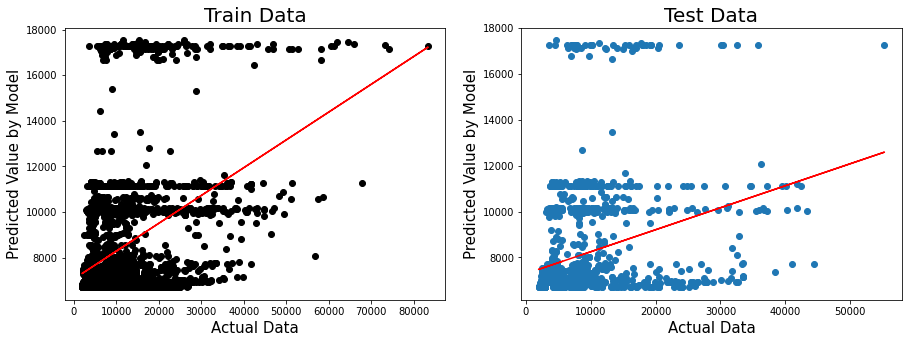

In [168]:
r_rand= RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(train_df, y_train)

## output prediction
pred_train = r_rand.predict(train_df)
pred_test = r_rand.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

In [169]:
### check model stats to see if perfromance is better after PCA. (ask teammates to check output and compare)

## XGBoost Regressor :

In [170]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'n_estimators': [500,600,400,200]
             }

xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=3, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)
grid_search.fit(train_df, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[02:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [500, 600, 400, 200]},
             return_train_score=True, scoring='r2', verbose=4)

In [171]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400}
Best cross-validation score: 0.19


In [172]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.980147      0.245015         0.092490        0.004078   
1      17.775644      0.213731         0.111998        0.007220   
2      11.905004      0.056353         0.076596        0.004993   
3       6.056483      0.040235         0.037079        0.000890   
4      18.041260      0.123227         0.108613        0.003257   

  param_learning_rate param_max_depth param_n_estimators  \
0                0.03               5                500   
1                0.03               5                600   
2                0.03               5                400   
3                0.03               5                200   
4                0.03               6                500   

                                              params  split0_test_score  \
0  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...           0.210936   
1  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...           0.212099   
2  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...           0.210966   
3  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...           0.203107   
4  {'learning_rate': 0.03, 'max_depth': 6, 'n_est...           0.231072   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.194597           0.147484         0.184339        0.026901   
1           0.194640           0.149075         0.185272        0.026568   
2           0.196919           0.144970         0.184285        0.028385   
3           0.190643           0.137695         0.177148        0.028358   
4           0.190333           0.134375         0.185260        0.039639   

   rank_test_score  split0_train_score  split1_train_score  \
0               24            0.718176            0.697290   
1               20            0.755925            0.729647   
2               25            0.676303            0.660011   
3               36            0.569544            0.542343   
4               21            0.824697            0.802774   

   split2_train_score  mean_train_score  std_train_score  
0            0.730056          0.715174         0.013544  
1            0.759191          0.748254         0.013224  
2            0.694738          0.677017         0.014187  
3            0.588317          0.566734         0.018873  
4            0.809460          0.812310         0.009174

[02:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model statistics:
Mean Absolute Error    1678.0522
Mean Squared Error     13223823.0896
R Square               0.6863
Adjusted R Square      0.6807




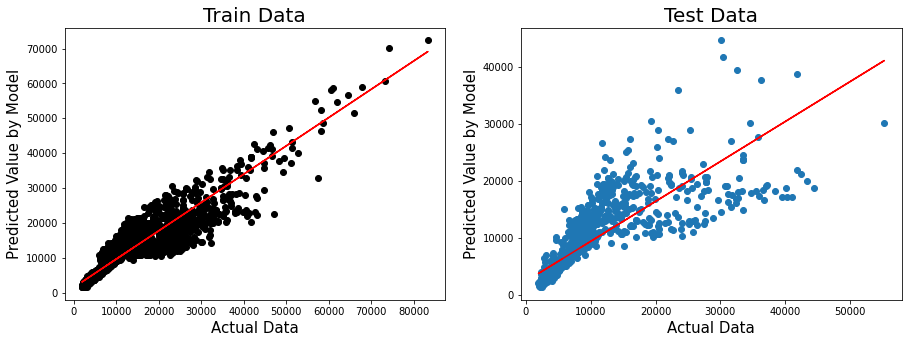

In [173]:
r_xgb= XGBRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             learning_rate = grid_search.best_params_['learning_rate'], 
                             n_estimators = grid_search.best_params_['n_estimators']
                             ).fit(x_train, y_train)

## output prediction
pred_train = r_xgb.predict(x_train)
pred_test = r_xgb.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

In [174]:
#Shap analysis
!pip install shap

     |████████████████████████████████| 564 kB 14.0 MB/s 


In [175]:
import shap
explainer = shap.TreeExplainer(r_xgb)
shap_values = explainer.shap_values(x)

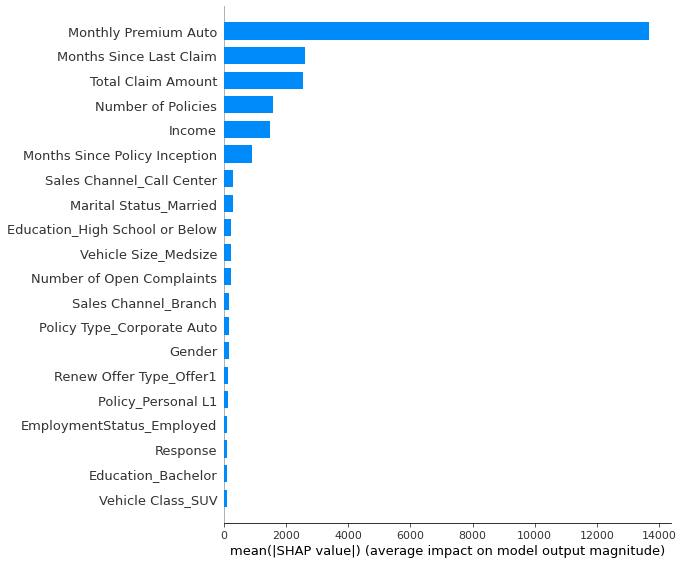

In [176]:
shap.summary_plot(shap_values, x, plot_type='bar')

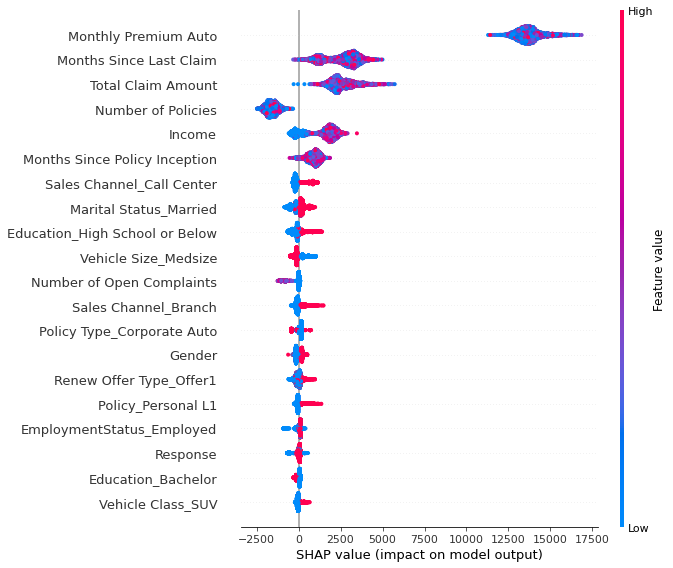

In [177]:
shap.summary_plot(shap_values, x)

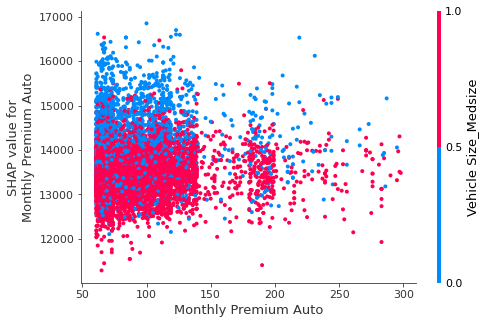

In [178]:
shap.dependence_plot('Monthly Premium Auto', shap_values, x)

# Neural Network :

In [179]:
!pip install tensorflow_addons
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras import layers, Input, optimizers, Model
from tensorflow.keras.layers import  Dense, Dropout
from keras.models import Sequential

     |████████████████████████████████| 1.1 MB 8.6 MB/s 


In [180]:
from keras import backend as K

def RSquare(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [181]:
clear_session()

inp = Input(shape=(x_train.shape[1],), dtype='int32', name='Input_Layer')
dense_layer1 = Dense(512, kernel_initializer='normal', activation='relu')(inp)
drop1 = Dropout(0.2)(dense_layer1)
dense_layer2 = Dense(256, kernel_initializer='normal', activation='relu')(drop1)
drop2 = Dropout(0.2)(dense_layer2)
dense_layer3 = Dense(128, kernel_initializer='normal', activation='relu')(drop2)
out = Dense(1, kernel_initializer='normal')(drop2)

## creating model
model = Model(inp, out)
## compile
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse',RSquare])

## fitting model
hist = model.fit(x_train, y_train, epochs=30, verbose=1, validation_data=(x_test, y_test), batch_size=150)

Epoch 1/30
49/49 [==============================] - 2s 17ms/step - loss: 112188736.0000 - mae: 7982.9023 - mse: 112188736.0000 - RSquare: -1.4088 - val_loss: 98474072.0000 - val_mae: 7504.3799 - val_mse: 98474072.0000 - val_RSquare: -1.4965
Epoch 2/30
49/49 [==============================] - 1s 10ms/step - loss: 93139696.0000 - mae: 6649.6143 - mse: 93139696.0000 - RSquare: -1.0042 - val_loss: 61635060.0000 - val_mae: 4671.3491 - val_mse: 61635060.0000 - val_RSquare: -0.4933
Epoch 3/30
49/49 [==============================] - 1s 15ms/step - loss: 54539124.0000 - mae: 4397.8579 - mse: 54539124.0000 - RSquare: -0.1298 - val_loss: 42072864.0000 - val_mae: 4325.3638 - val_mse: 42072864.0000 - val_RSquare: -0.0232
Epoch 4/30
49/49 [==============================] - 1s 16ms/step - loss: 47849920.0000 - mae: 4459.9141 - mse: 47849920.0000 - RSquare: 0.0063 - val_loss: 41225948.0000 - val_mae: 4209.5391 - val_mse: 41225948.0000 - val_RSquare: 0.0012
Epoch 5/30
49/49 [==========================

In [182]:
def loss_plot(train_loss, test_loss, total_epoch, given):
    """
    This function plots the loss graph of both train and validation dataset.
    """
    fig = plt.figure(figsize=(15,5))  #setting up figure size
    plt.plot(train_loss);  plt.plot(test_loss)
    #setting up ticks
    plt.xticks(range(0,total_epoch))
    plt.legend(["Train_Loss", "Validation_Loss"])
    #setting up labels
    plt.xlabel("Number of Epochs", fontsize=15)
    plt.ylabel("Loss", fontsize=15)
    plt.title(given, fontsize=20)
    return plt.show()



def accuracy_plot(train_accuracy, test_accuracy, total_epoch, given):
    """
    This function plots the accuracy graph of both train and validation dataset.
    """
    fig = plt.figure(figsize=(15,5))  #setting up figure size
    plt.plot(train_accuracy);  plt.plot(test_accuracy)
    #setting up ticks
    plt.xticks(range(0,total_epoch))
    plt.legend(["Train_Accuracy", "Validation_Accuracy"])
    #setting up labels
    plt.xlabel("Number of Epochs", fontsize=15)
    plt.ylabel("RSquare(coefficient of determination)", fontsize=15)
    plt.title(given, fontsize=20)
    return plt.show()

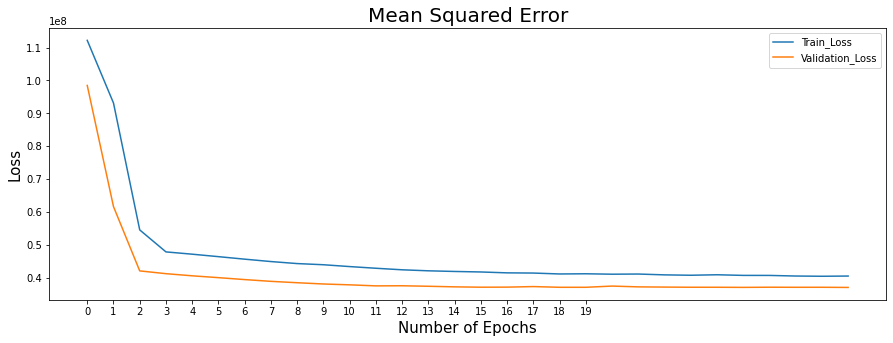

In [183]:
loss_plot(hist.history["loss"], hist.history["val_loss"], 20, "Mean Squared Error")

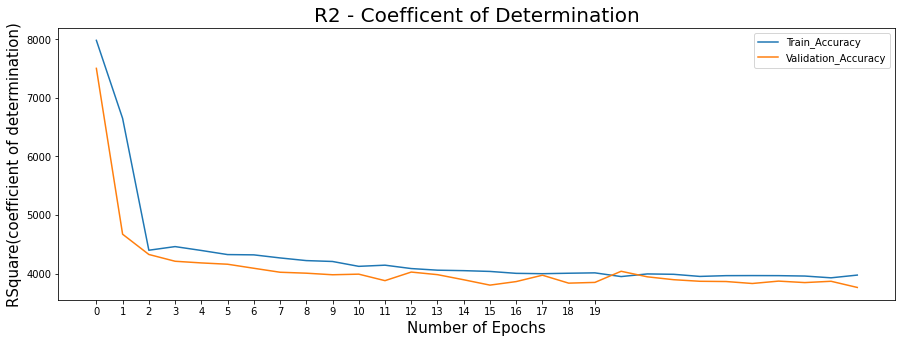

In [184]:
accuracy_plot(hist.history["mae"], hist.history["val_mae"], 20, "R2 - Coefficent of Determination")

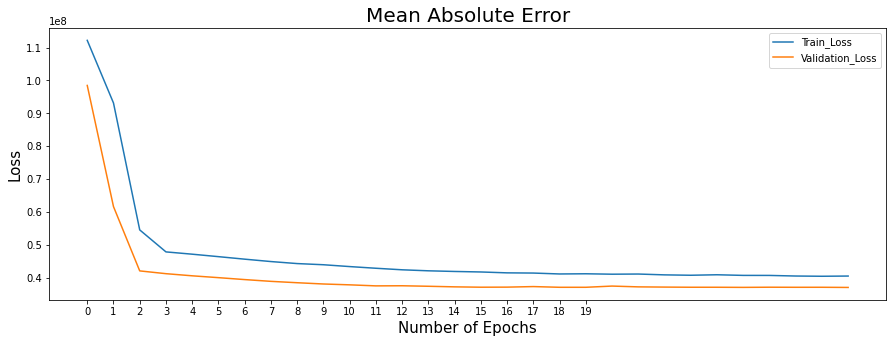

In [185]:
loss_plot(hist.history["loss"], hist.history["val_loss"], 20, "Mean Absolute Error")

In [186]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 57)]              0         
                                                                 
 dense (Dense)               (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 161,281
Trainable params: 161,281
Non-trainable

In [187]:
from sklearn.metrics import r2_score
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=32)
## output prediction
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))

229/229 [==============================] - 1s 6ms/step - loss: 40687452.0000 - mae: 3933.5708 - mse: 40687452.0000 - RSquare: 0.0845 - val_loss: 36996588.0000 - val_mae: 3780.1243 - val_mse: 36996588.0000 - val_RSquare: 0.0087
Model statistics:
Mean Absolute Error    3780.1245
Mean Squared Error     36996595.0079
R Square               0.1224


### All Model comparison :

In [188]:
models_df = pd.DataFrame(columns= ['Models','Mean Absolute Error', 'Mean Squared Error',
                                'R Square', 'Adjusted R Square'])

models_df['Models'] = ['Linear Regression', 'KNN Regression', 'Ridge', 'Lasso', 'Decision Tree Regression', 'Random Forest Regression', 'Decision Tree Regressor with Bagging','Bagging with Random Forest Regressor','Pasting with Decision Tree Regressor','Pasting with Random Forest Regressor','AdaBoost on Decision Tree Regressor','AdaBoost on Random Forest Regressor','Gradient Boosting','Linear Regression with PCA','KNN Regression with PCA','Ridge with PCA','Lasso with PCA','Decision Tree Regressor with PCA','Random Forest Regressor With PCA','XGBoost Regressor']
models_df['Mean Absolute Error'] = [3895.9590,3539.4870,3848.8676,3837.1633,1651.8883,1671.6088,1728.7578,1689.5743,1753.5898,1673.0628,1746.2918,1624.4641,1680.9782,3948.6107,3630.9857,3947.9248,3938.9290,4029.6406,4027.3392,1754.1345]
models_df['Mean Squared Error'] = [37114812.2763,35194771.9482,36930084.5619,36837066.7760,14555286.5703,13540051.9335,13665319.0898,13622813.5285,14587699.9986,13539819.9756,14331808.6419,13678400.9516,14363143.6377,37618124.5201,35680944.9166,37600160.2443, 37574392.7912,40367935.4474,38837488.3527,13536522.1212]
models_df['R Square'] = [0.1196,0.1652,0.1240,0.1262,0.6547,0.6788,0.6759,0.6769,0.6540,0.6788,0.6600,0.6755,0.6593,0.1077,0.1536,0.1081, 0.1087,0.0425,0.0788,0.6789]
models_df['Adjusted R Square'] = [0.0913,0.1383,0.0958,0.0981,0.6436,0.6685,0.6654,0.6665,0.6428,0.6685,0.6491,0.6651,0.6483,0.0918,0.1385,0.0922,0.0928,0.0254,0.0623,0.6732]


print("--------------------------- ALL MODELS COMPARISION TABLE ---------------------------")
models_df

--------------------------- ALL MODELS COMPARISION TABLE ---------------------------


Models  Mean Absolute Error  \
0                      Linear Regression            3895.9590   
1                         KNN Regression            3539.4870   
2                                  Ridge            3848.8676   
3                                  Lasso            3837.1633   
4               Decision Tree Regression            1651.8883   
5               Random Forest Regression            1671.6088   
6   Decision Tree Regressor with Bagging            1728.7578   
7   Bagging with Random Forest Regressor            1689.5743   
8   Pasting with Decision Tree Regressor            1753.5898   
9   Pasting with Random Forest Regressor            1673.0628   
10   AdaBoost on Decision Tree Regressor            1746.2918   
11   AdaBoost on Random Forest Regressor            1624.4641   
12                     Gradient Boosting            1680.9782   
13            Linear Regression with PCA            3948.6107   
14               KNN Regression with PCA            3630.9857   
15                        Ridge with PCA            3947.9248   
16                        Lasso with PCA            3938.9290   
17      Decision Tree Regressor with PCA            4029.6406   
18      Random Forest Regressor With PCA            4027.3392   
19                     XGBoost Regressor            1754.1345   

    Mean Squared Error  R Square  Adjusted R Square  
0         3.711481e+07    0.1196             0.0913  
1         3.519477e+07    0.1652             0.1383  
2         3.693008e+07    0.1240             0.0958  
3         3.683707e+07    0.1262             0.0981  
4         1.455529e+07    0.6547             0.6436  
5         1.354005e+07    0.6788             0.6685  
6         1.366532e+07    0.6759             0.6654  
7         1.362281e+07    0.6769             0.6665  
8         1.458770e+07    0.6540             0.6428  
9         1.353982e+07    0.6788             0.6685  
10        1.433181e+07    0.6600             0.6491  
11        1.367840e+07    0.6755             0.6651  
12        1.436314e+07    0.6593             0.6483  
13        3.761812e+07    0.1077             0.0918  
14        3.568094e+07    0.1536             0.1385  
15        3.760016e+07    0.1081             0.0922  
16        3.757439e+07    0.1087             0.0928  
17        4.036794e+07    0.0425             0.0254  
18        3.883749e+07    0.0788             0.0623  
19        1.353652e+07    0.6789             0.6732

From my analysis and models, it is observed that the Random Forest performs the best to predict Customer Lifetime Value.